In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
df_weather_train = pd.read_csv("weather_train.csv")
df_weather_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [94]:
def plot_gb(df : pd.DataFrame,group_by : str,x : str,y : str,fig_size : tuple[int,int] = (30,10)):
    ax = plt.figure(figsize=fig_size).gca()  # Create a single figure and axis

    for id, group in df.groupby(group_by):
        group.plot(x=x, y=y, ax=ax, label=f"{group_by} {id}")

    plt.title(f"{x} vs {y} for different {group_by}")
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")
    plt.legend()
    plt.show()

In [95]:
# for y in df_weather_train.columns.difference(['timestamp','site_id']):
#     plot_gb(df=df_weather_train,x="timestamp",y=y,group_by="site_id")

site_id
0     [Axes(0.125,0.11;0.775x0.77)]
1     [Axes(0.125,0.11;0.775x0.77)]
2     [Axes(0.125,0.11;0.775x0.77)]
3     [Axes(0.125,0.11;0.775x0.77)]
4     [Axes(0.125,0.11;0.775x0.77)]
5     [Axes(0.125,0.11;0.775x0.77)]
6     [Axes(0.125,0.11;0.775x0.77)]
7     [Axes(0.125,0.11;0.775x0.77)]
8     [Axes(0.125,0.11;0.775x0.77)]
9     [Axes(0.125,0.11;0.775x0.77)]
10    [Axes(0.125,0.11;0.775x0.77)]
11    [Axes(0.125,0.11;0.775x0.77)]
12    [Axes(0.125,0.11;0.775x0.77)]
13    [Axes(0.125,0.11;0.775x0.77)]
14    [Axes(0.125,0.11;0.775x0.77)]
15    [Axes(0.125,0.11;0.775x0.77)]
dtype: object

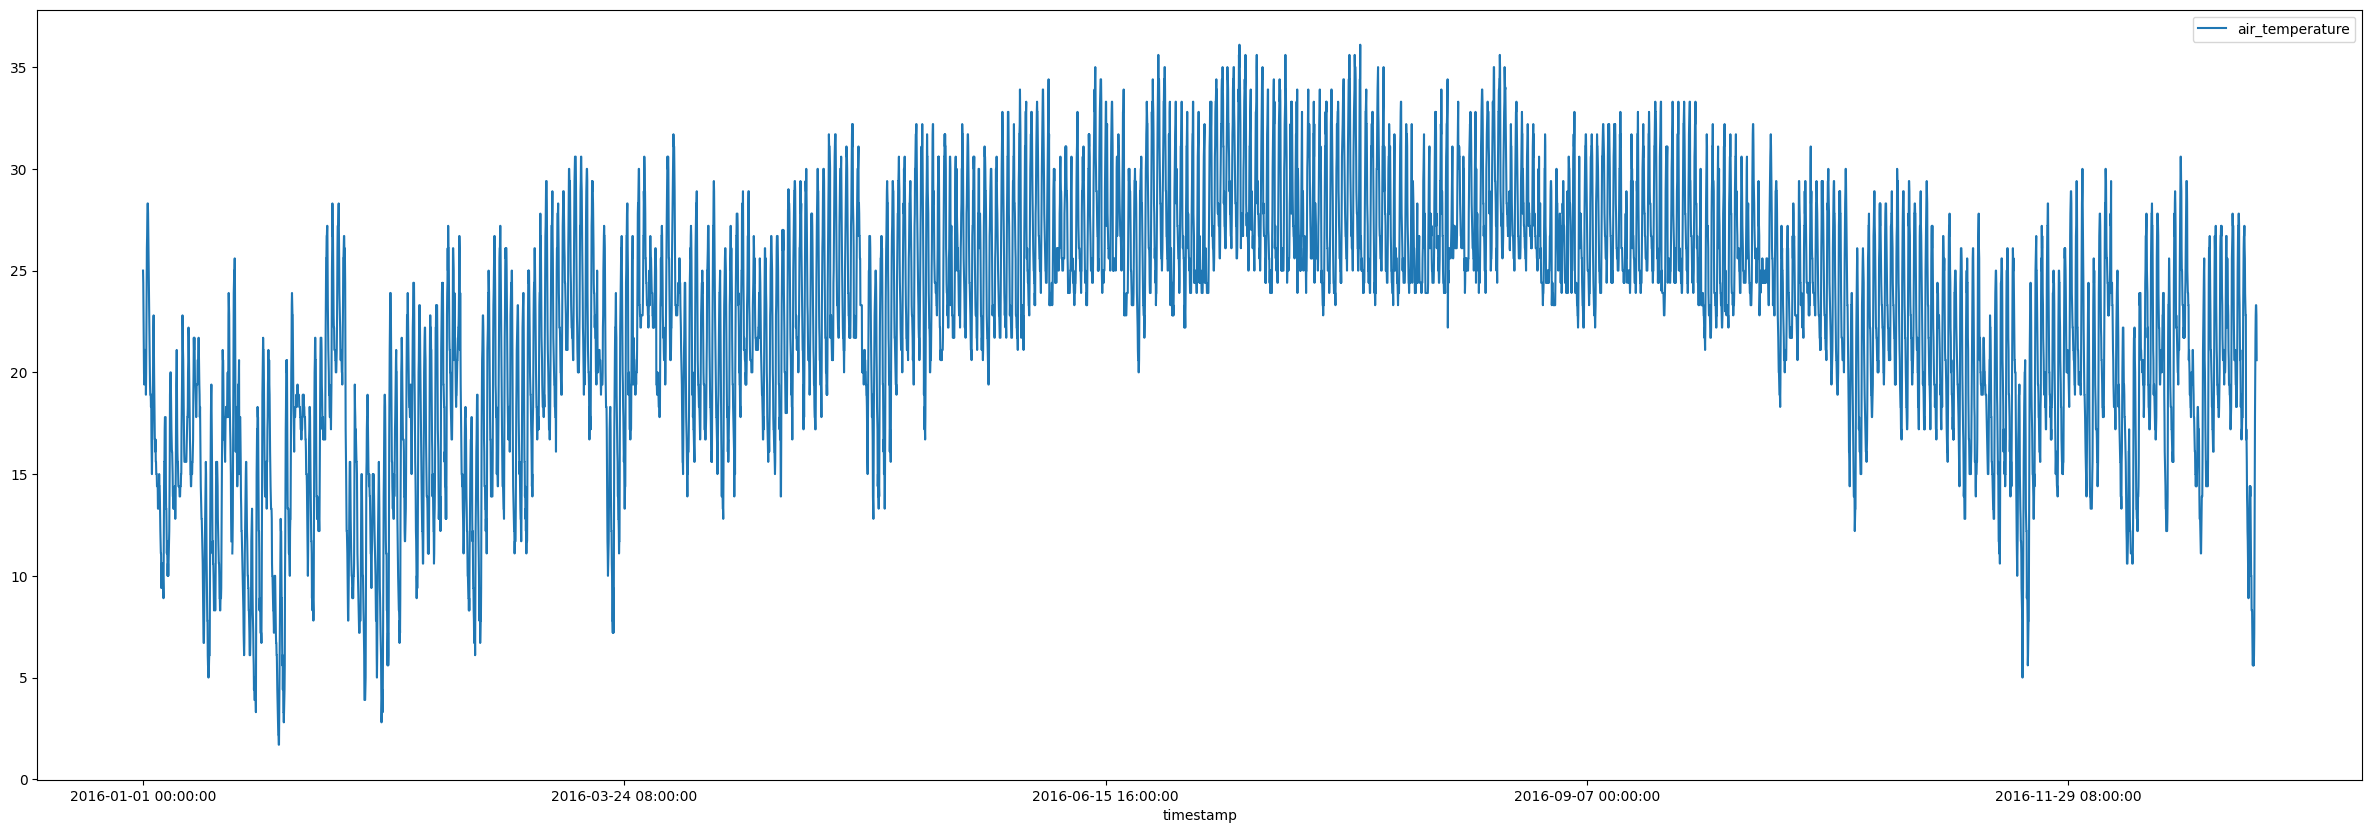

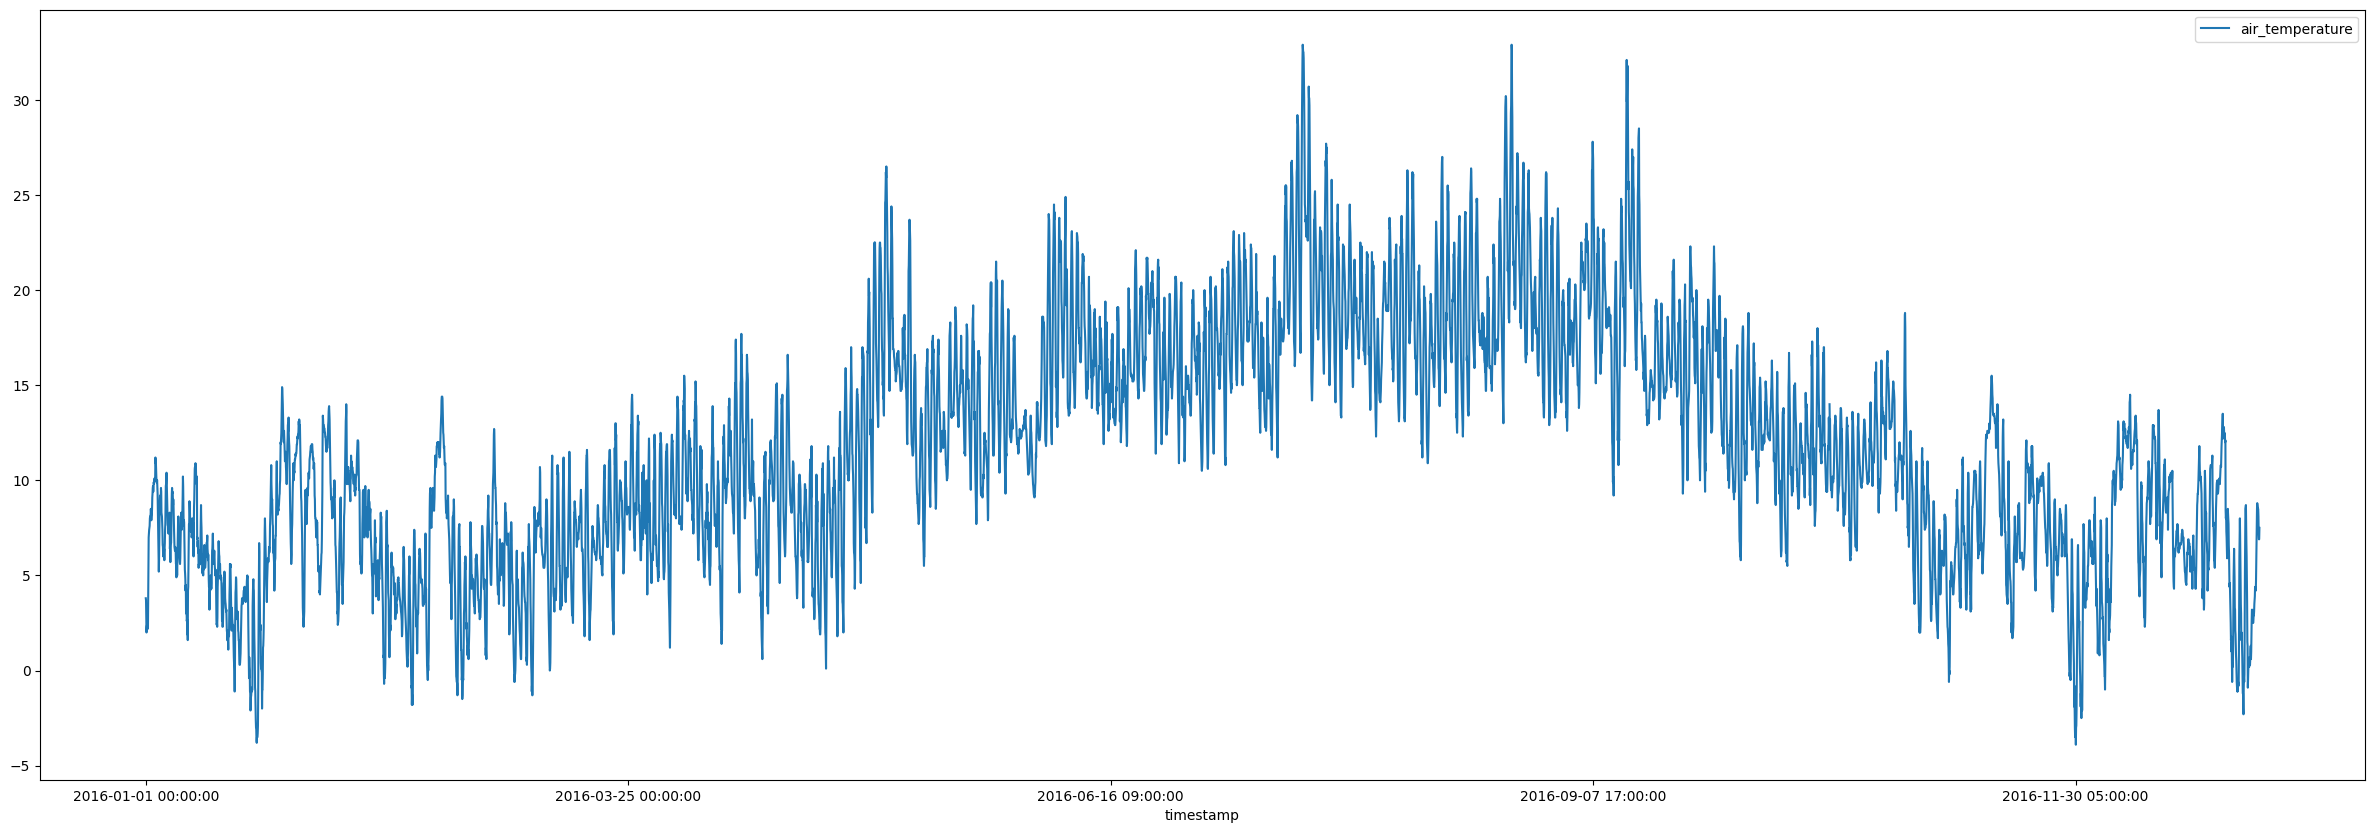

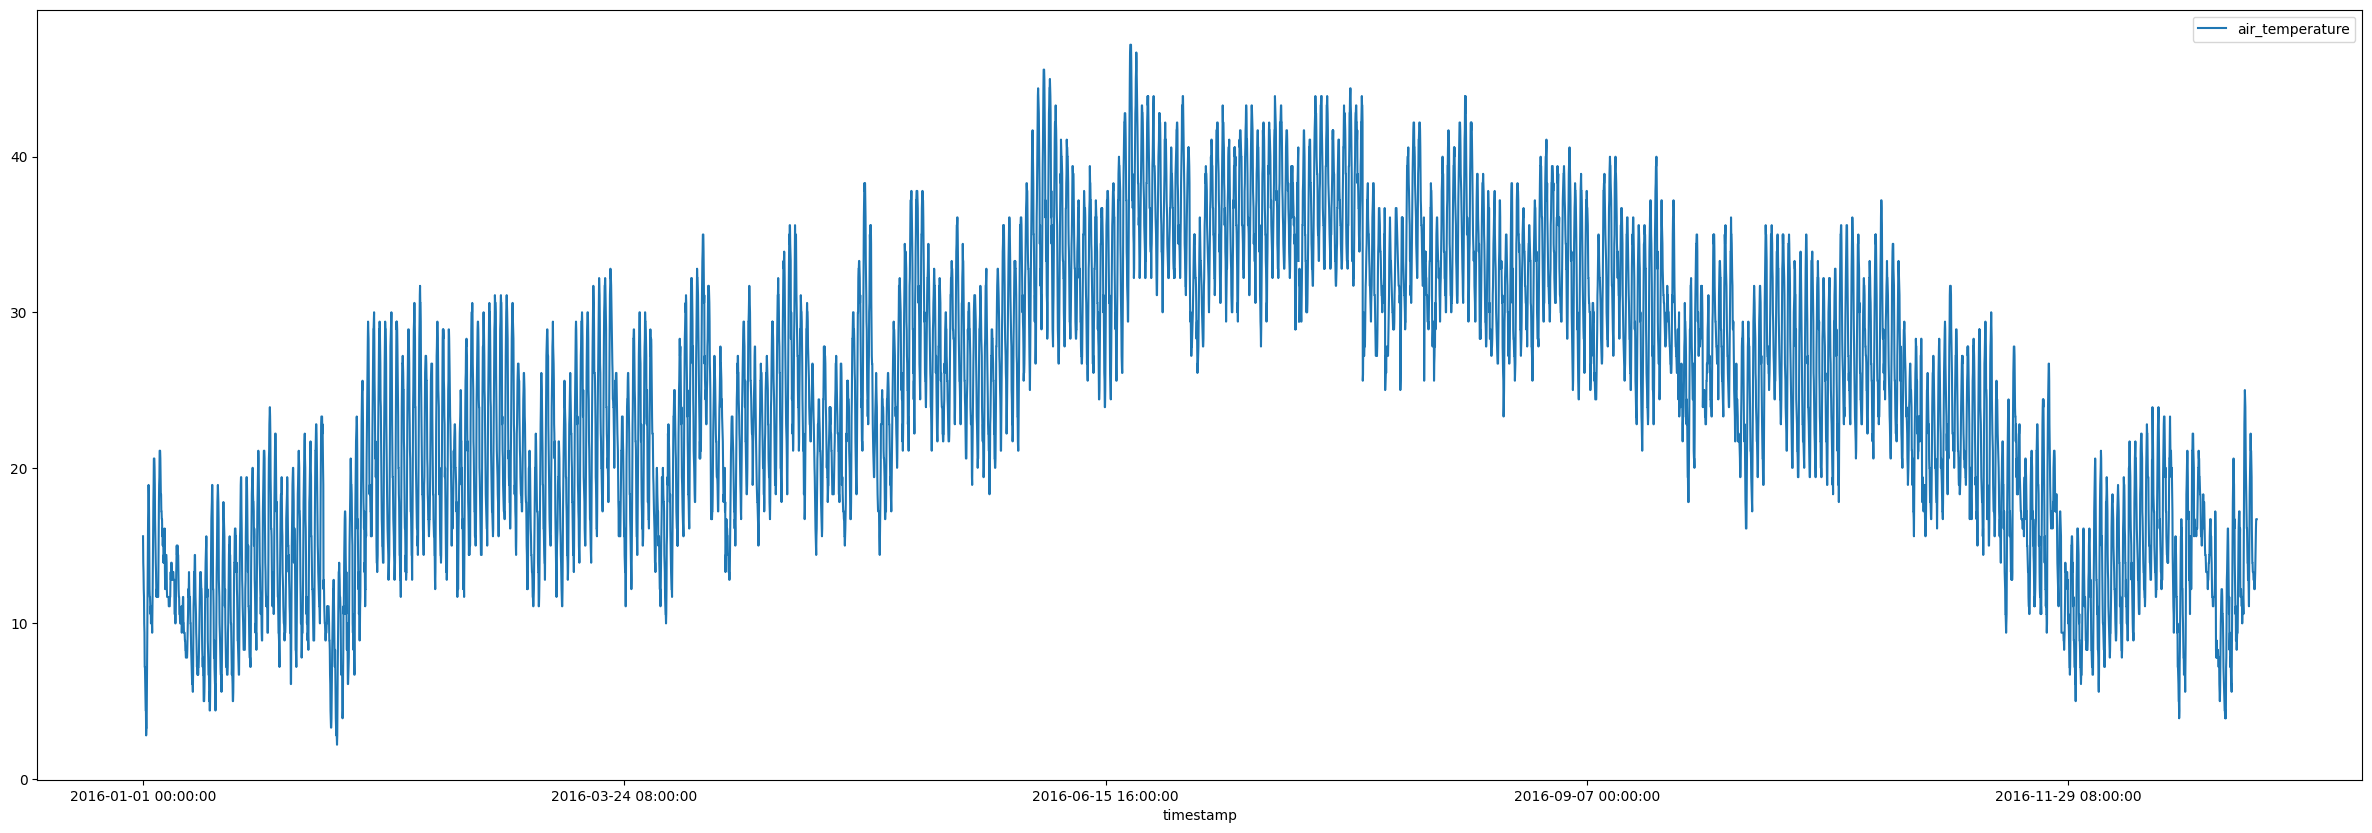

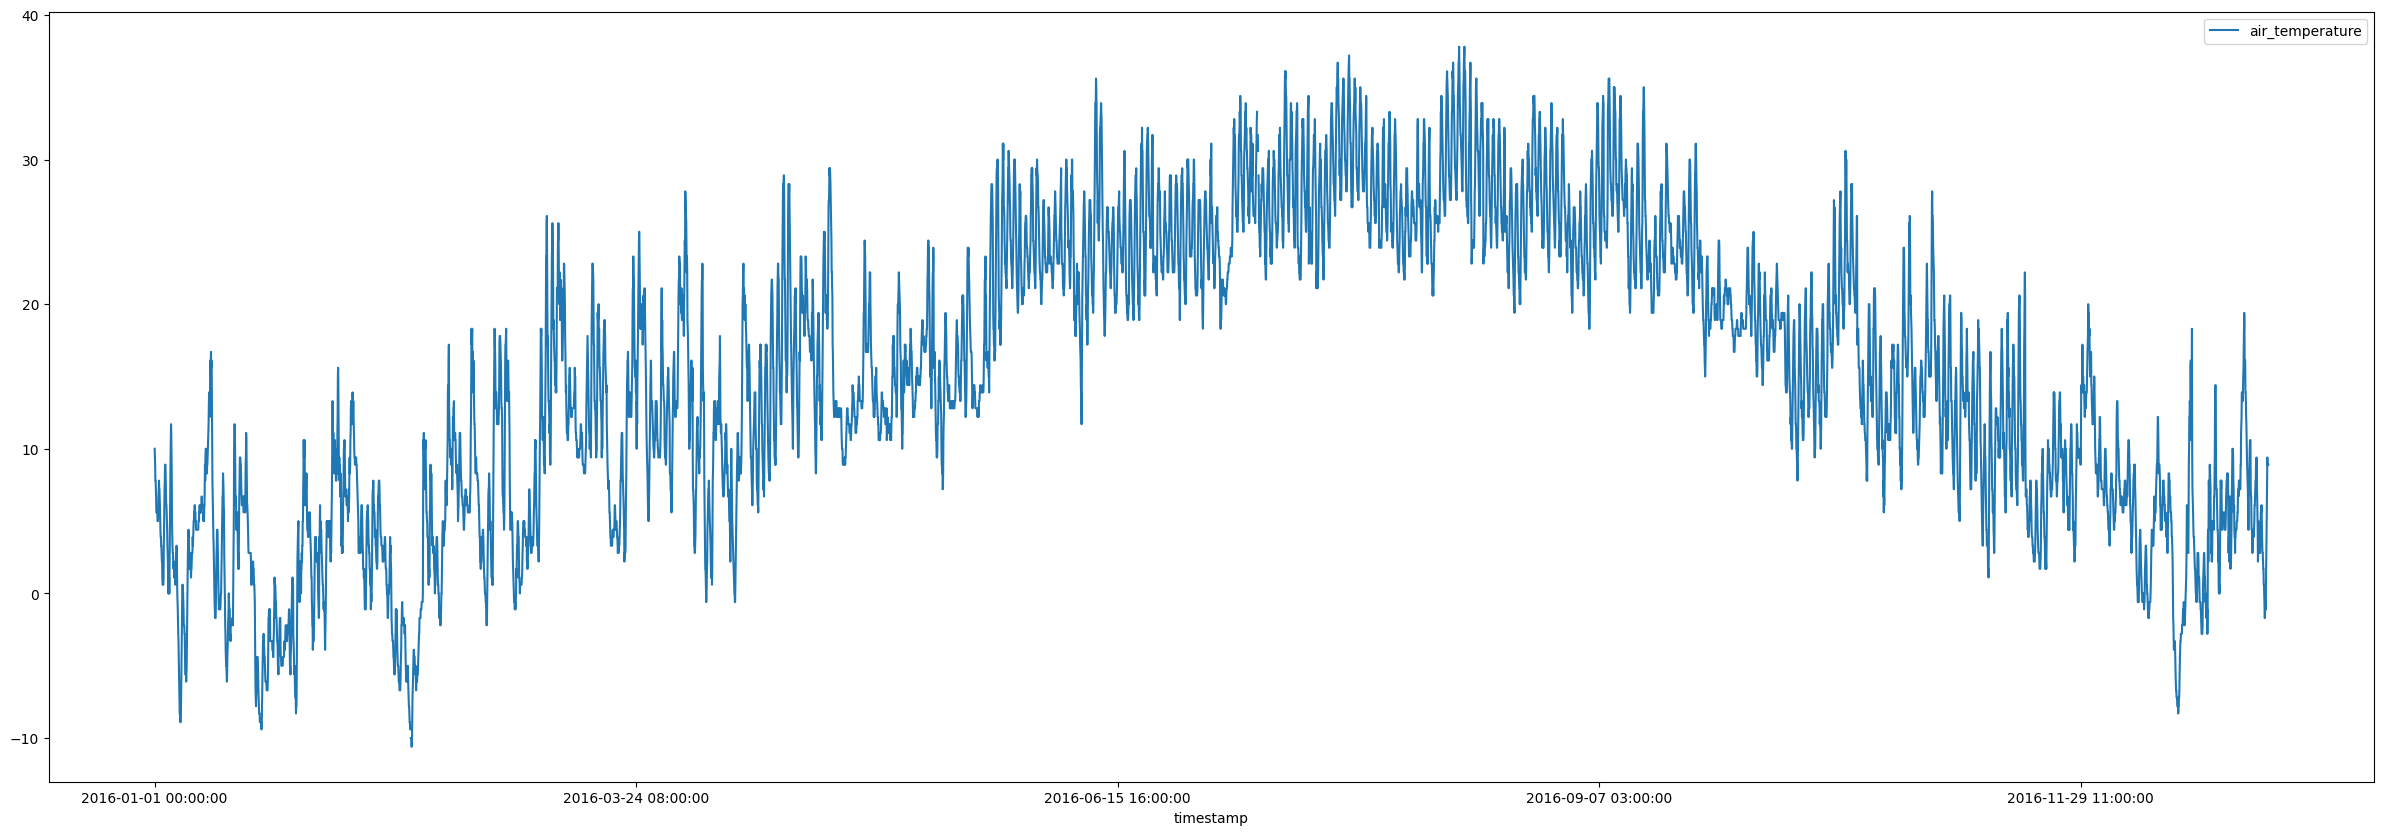

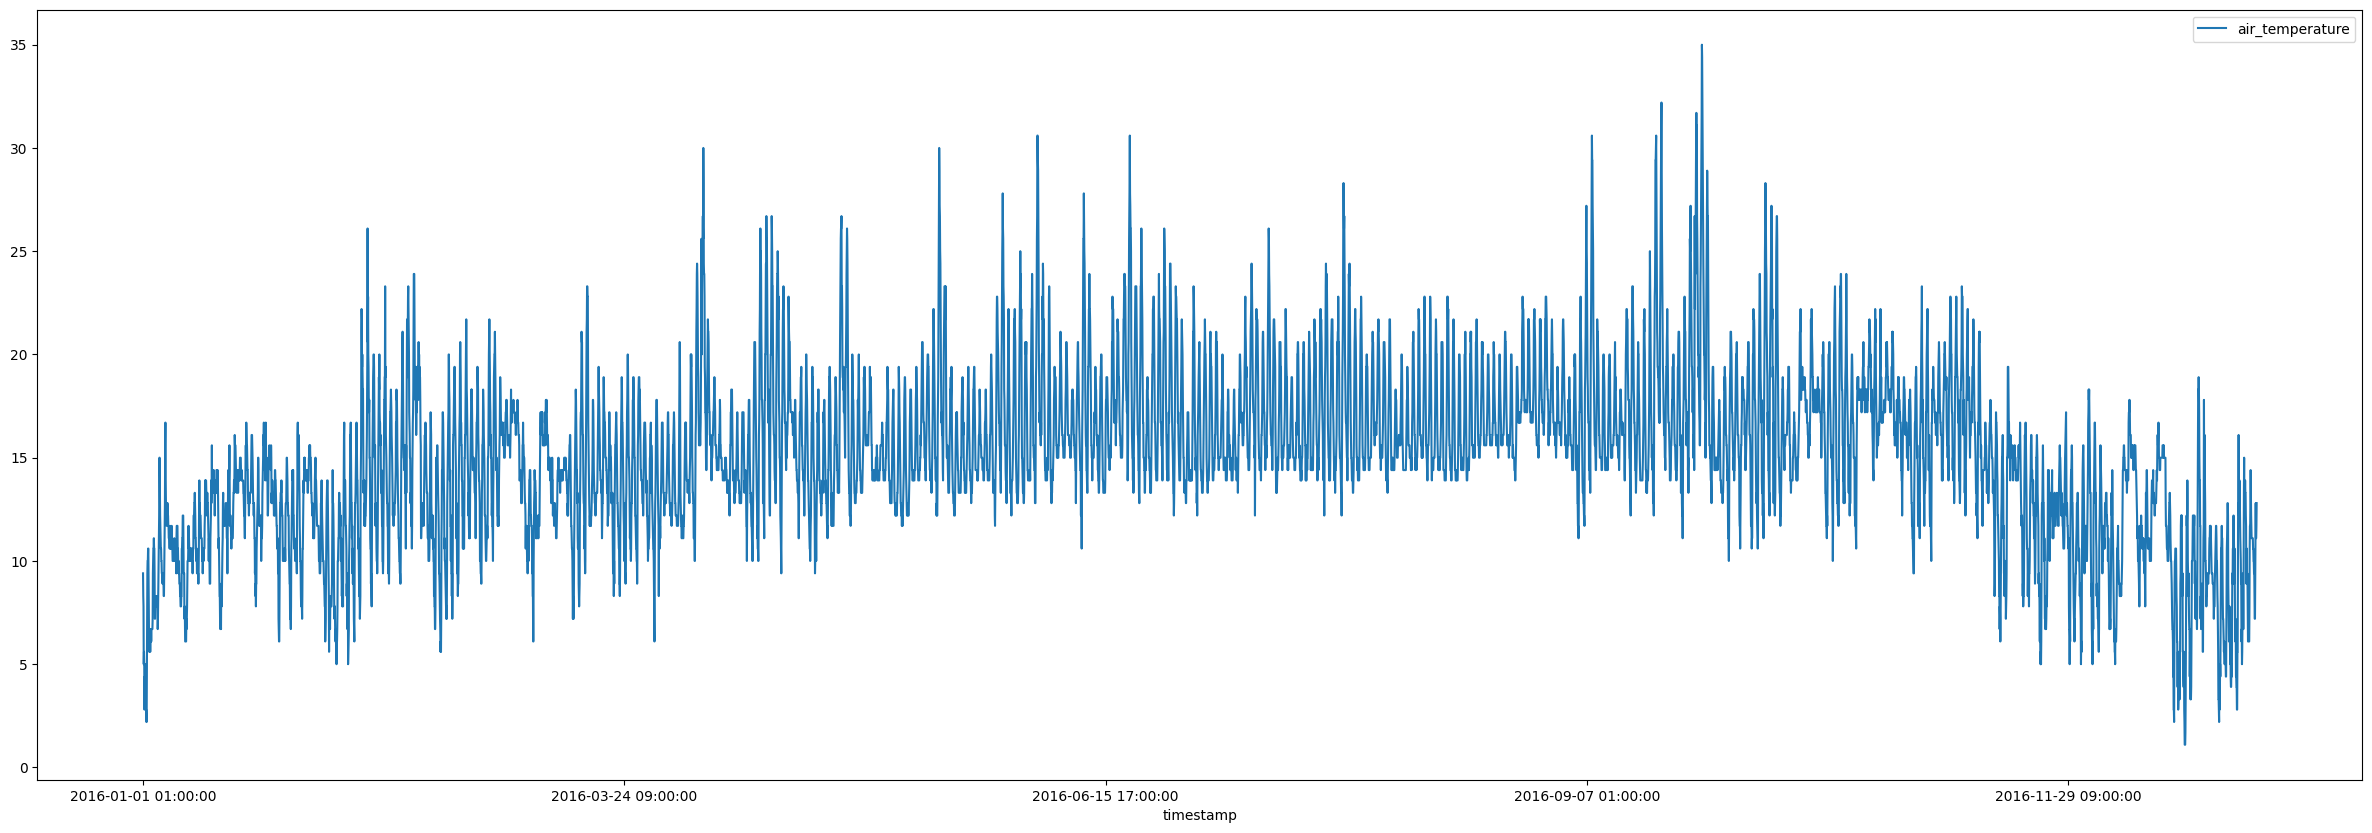

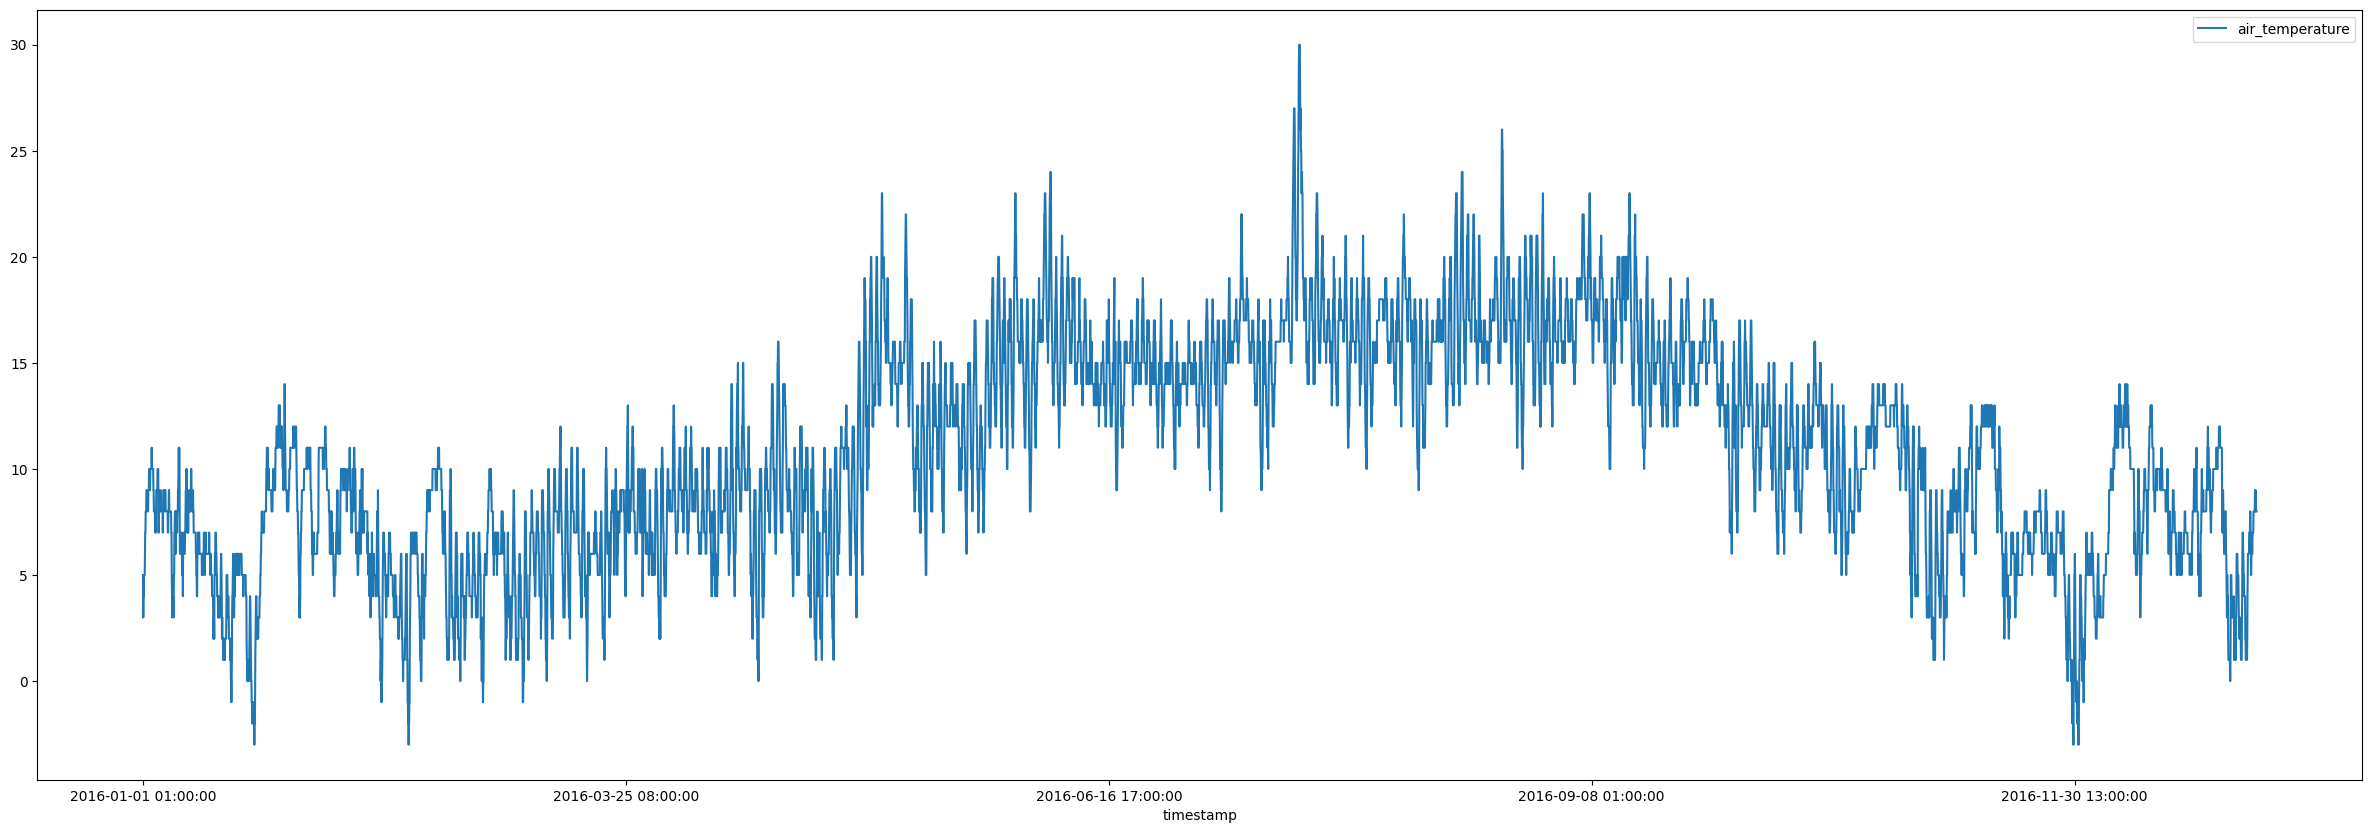

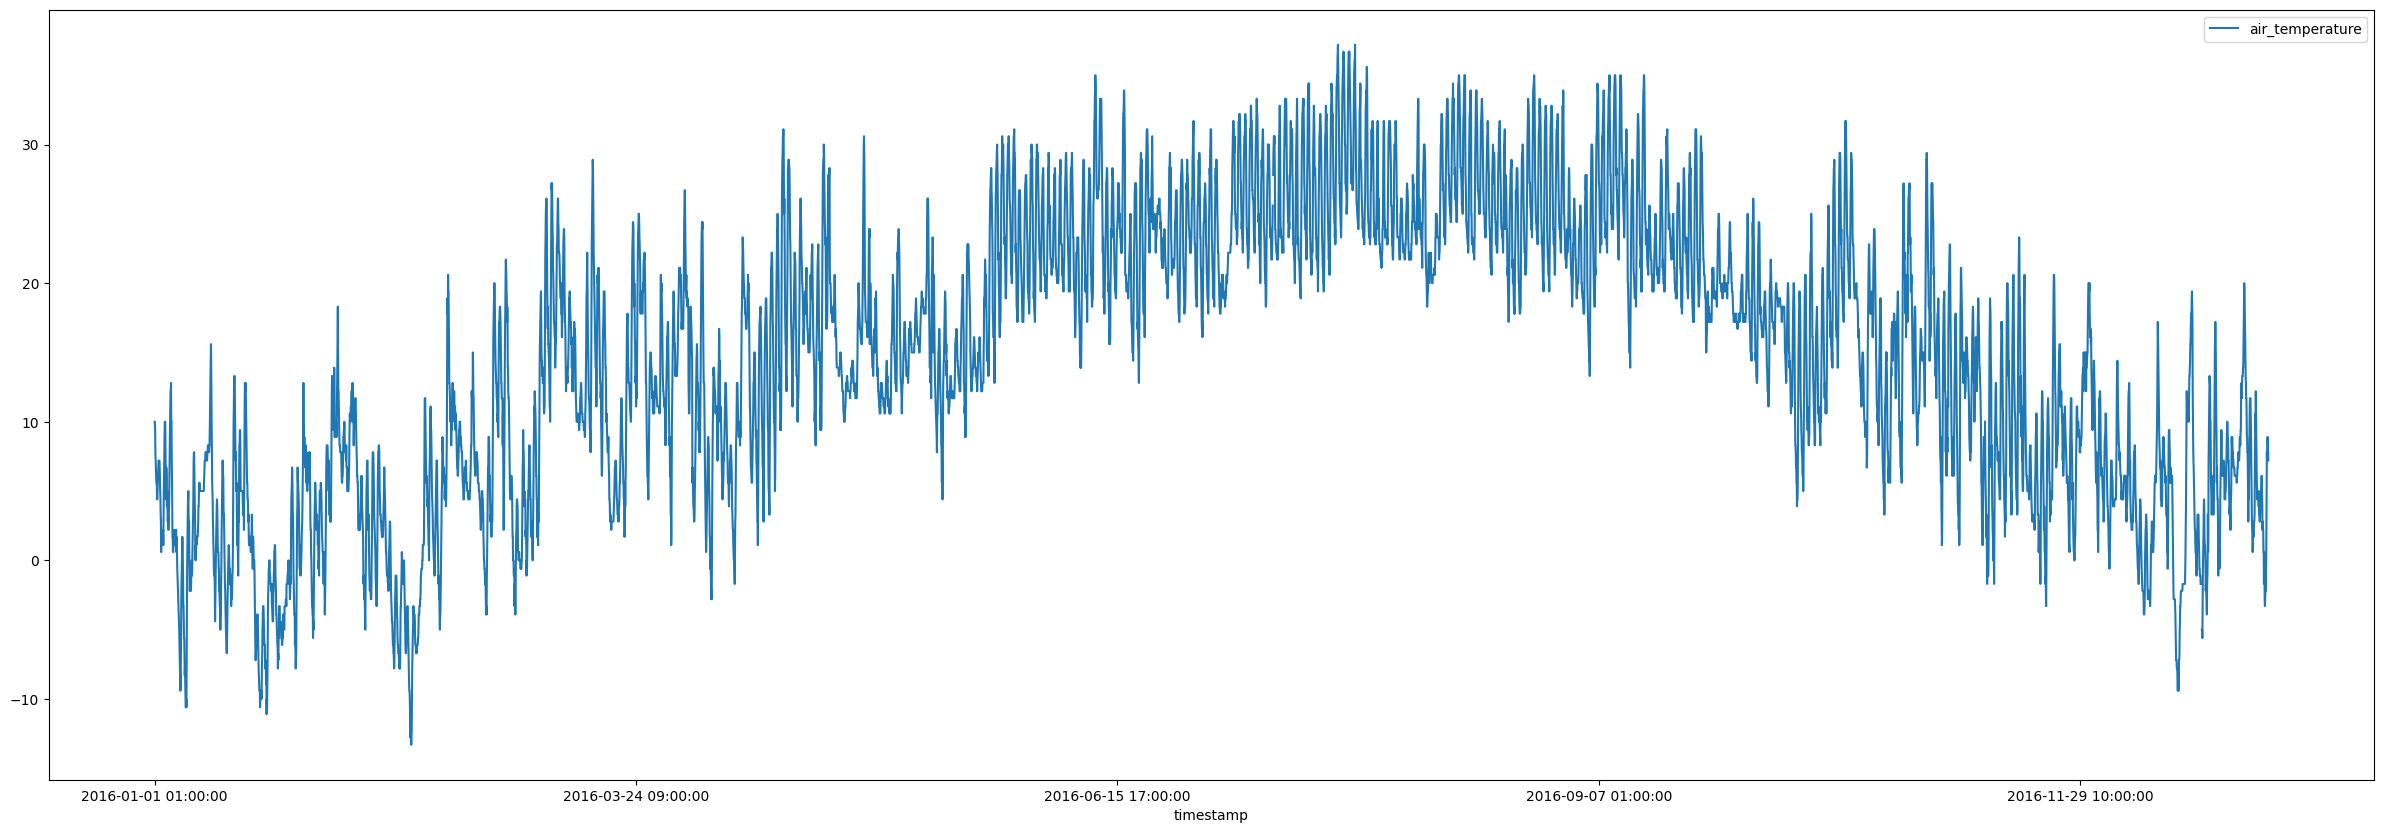

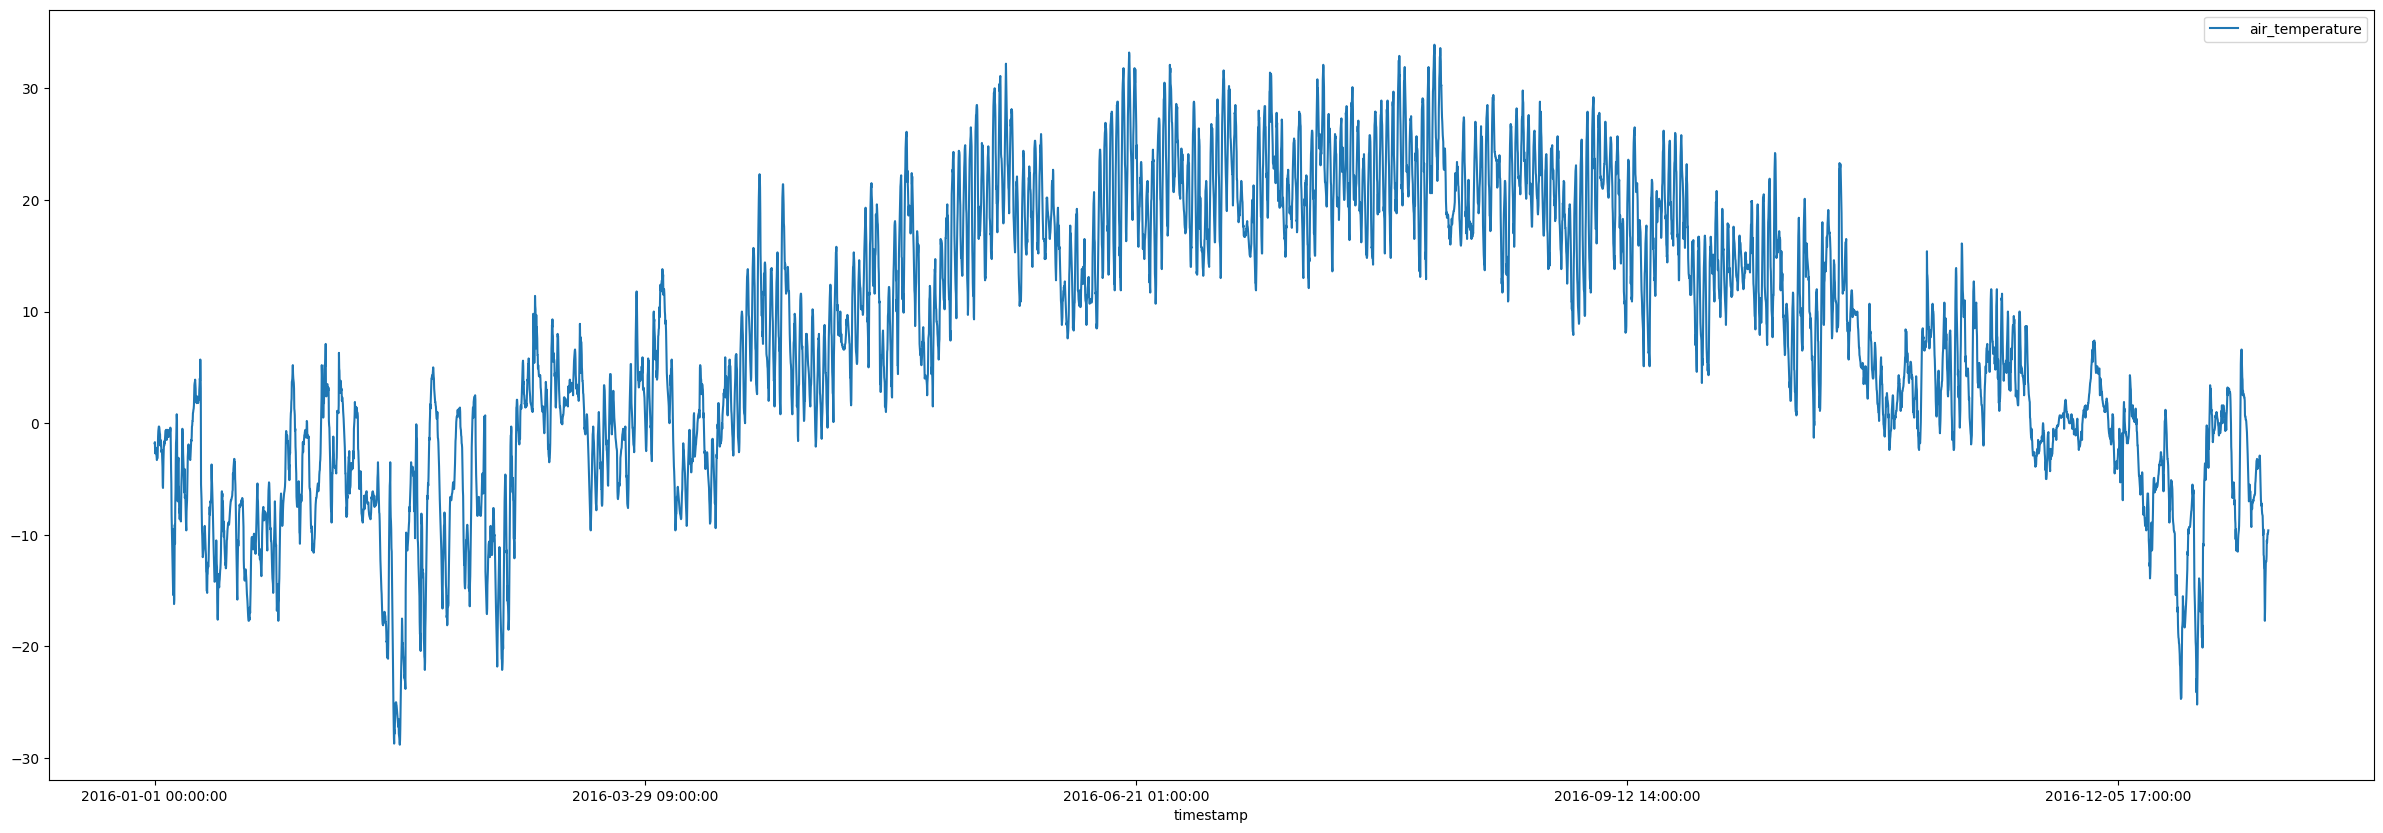

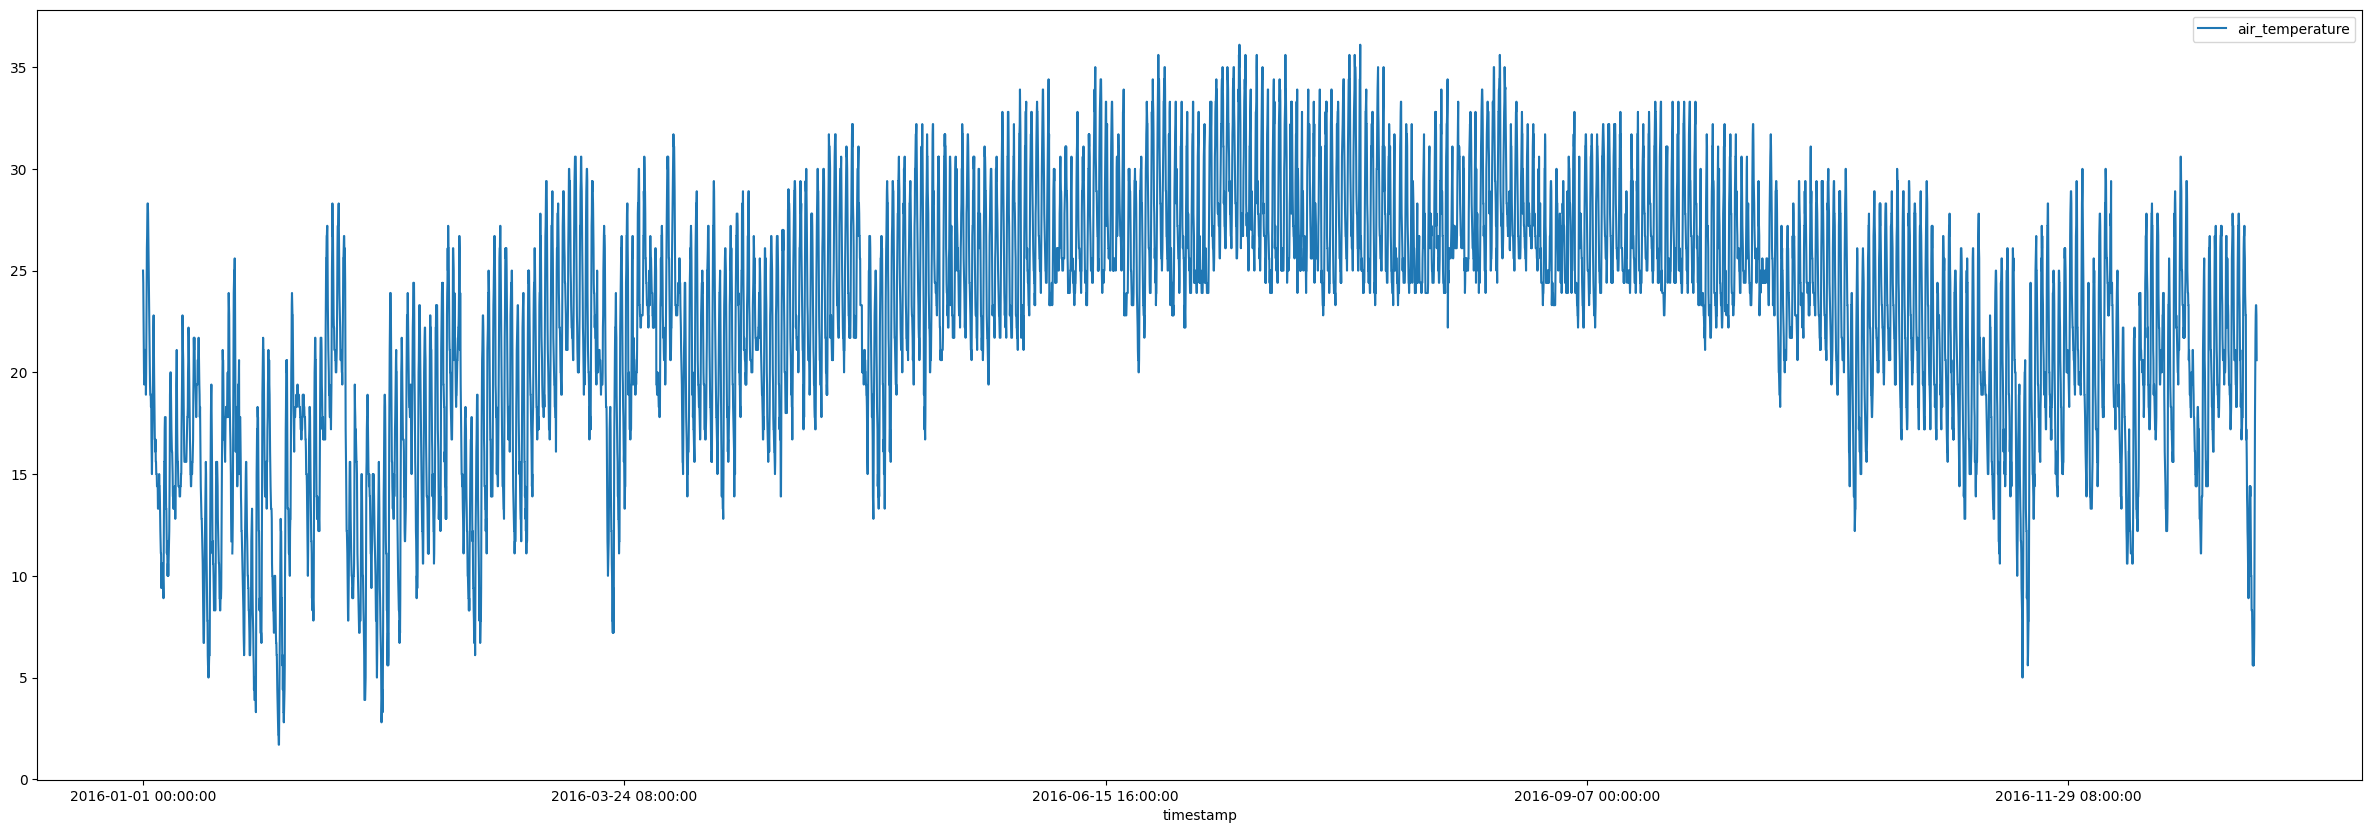

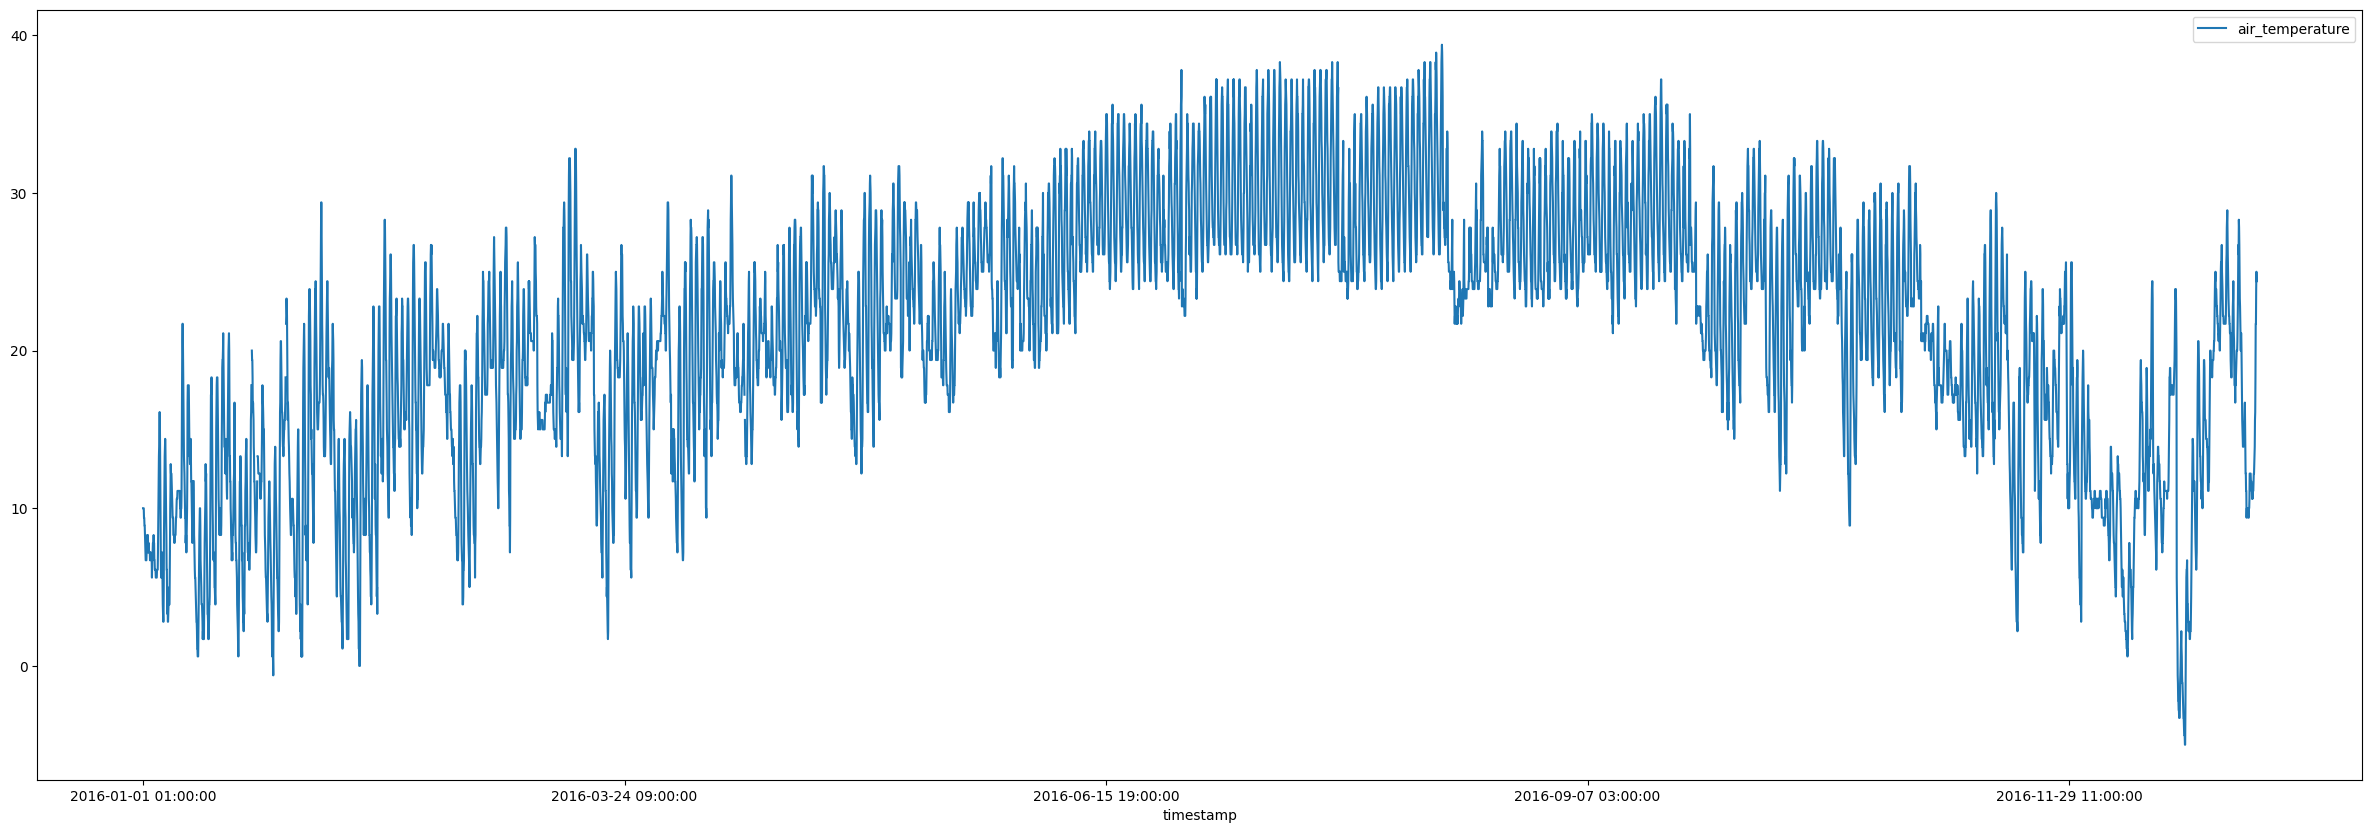

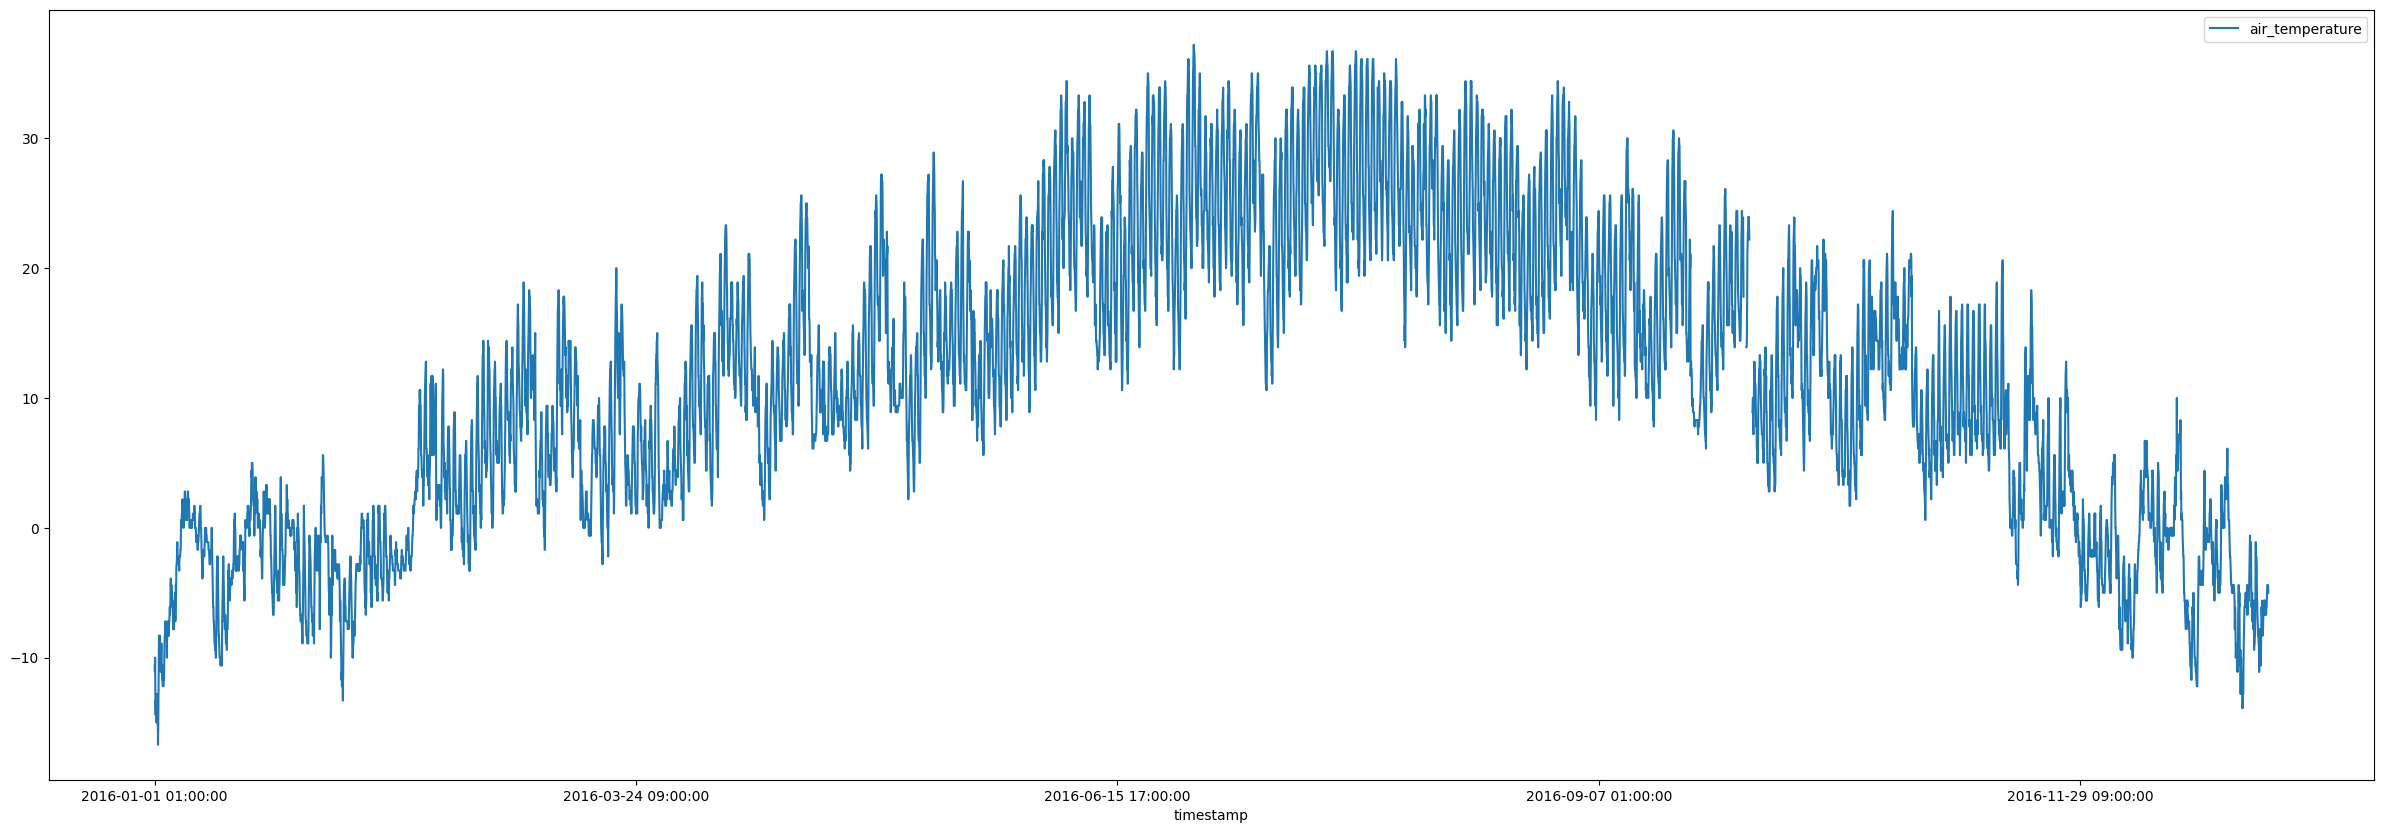

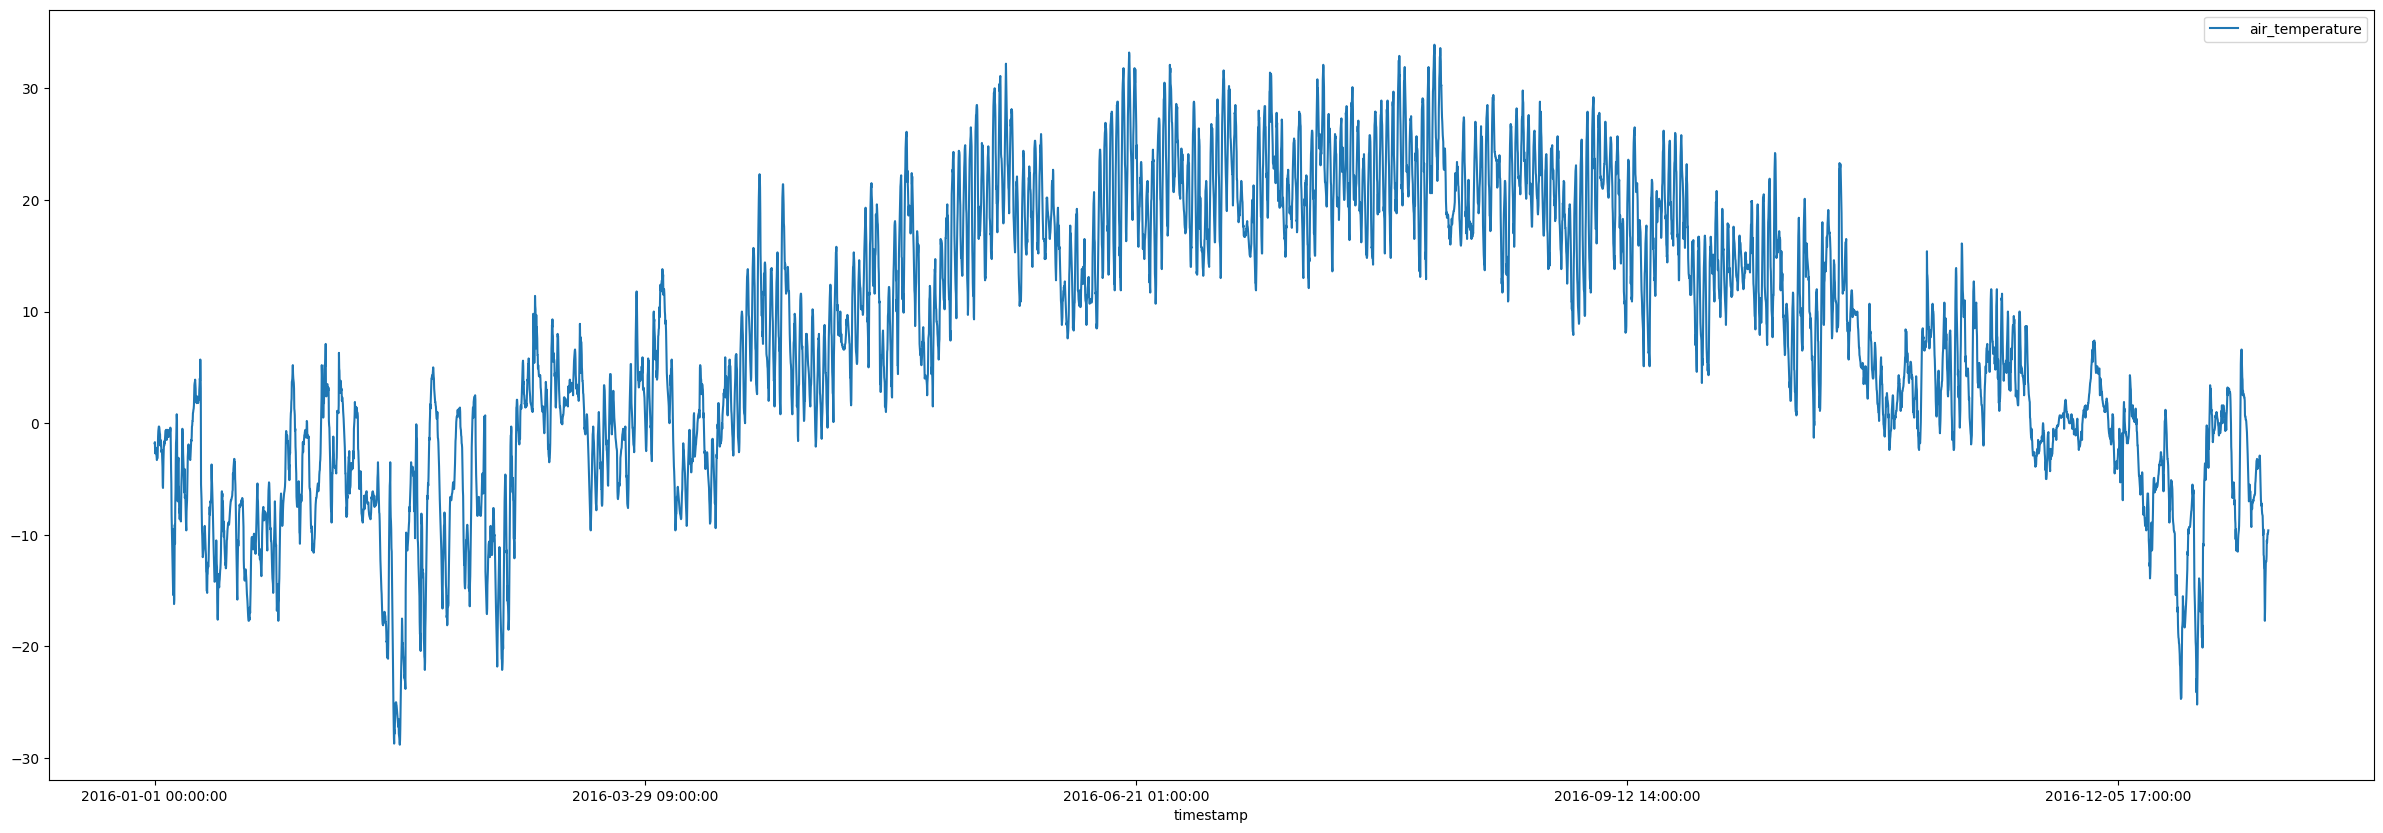

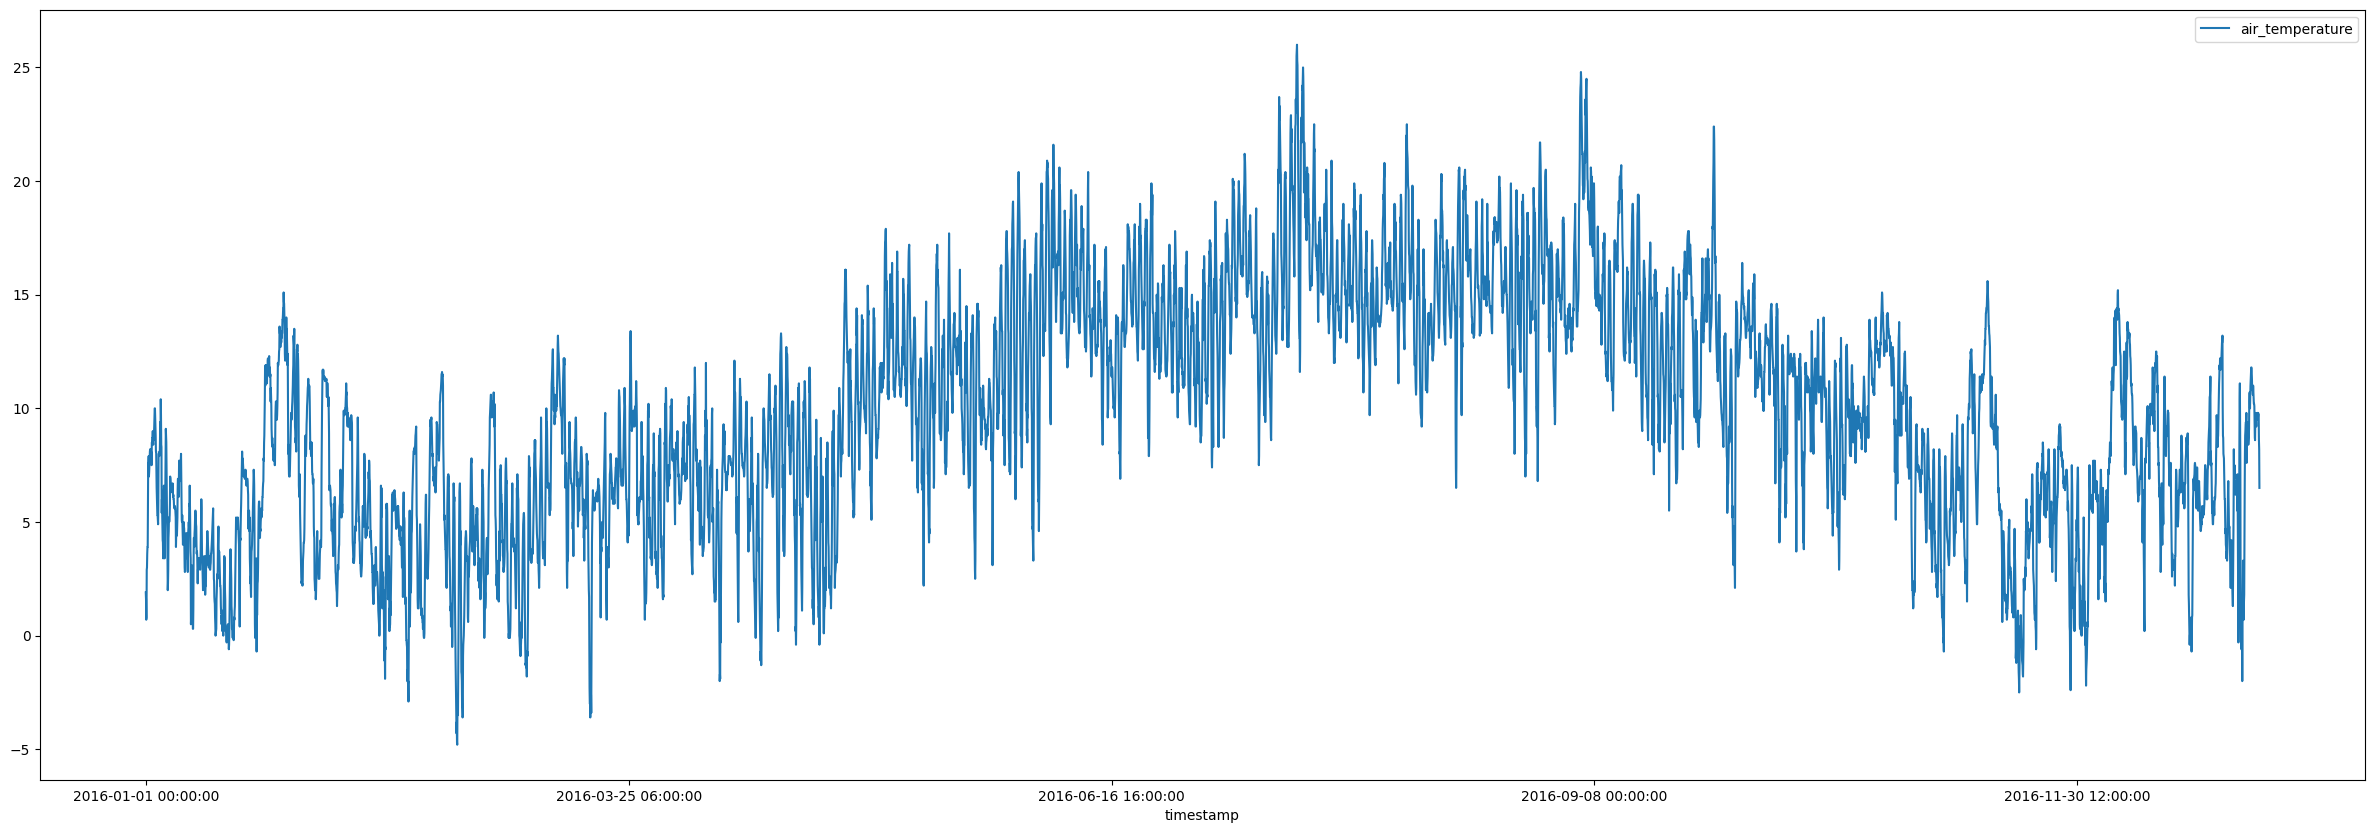

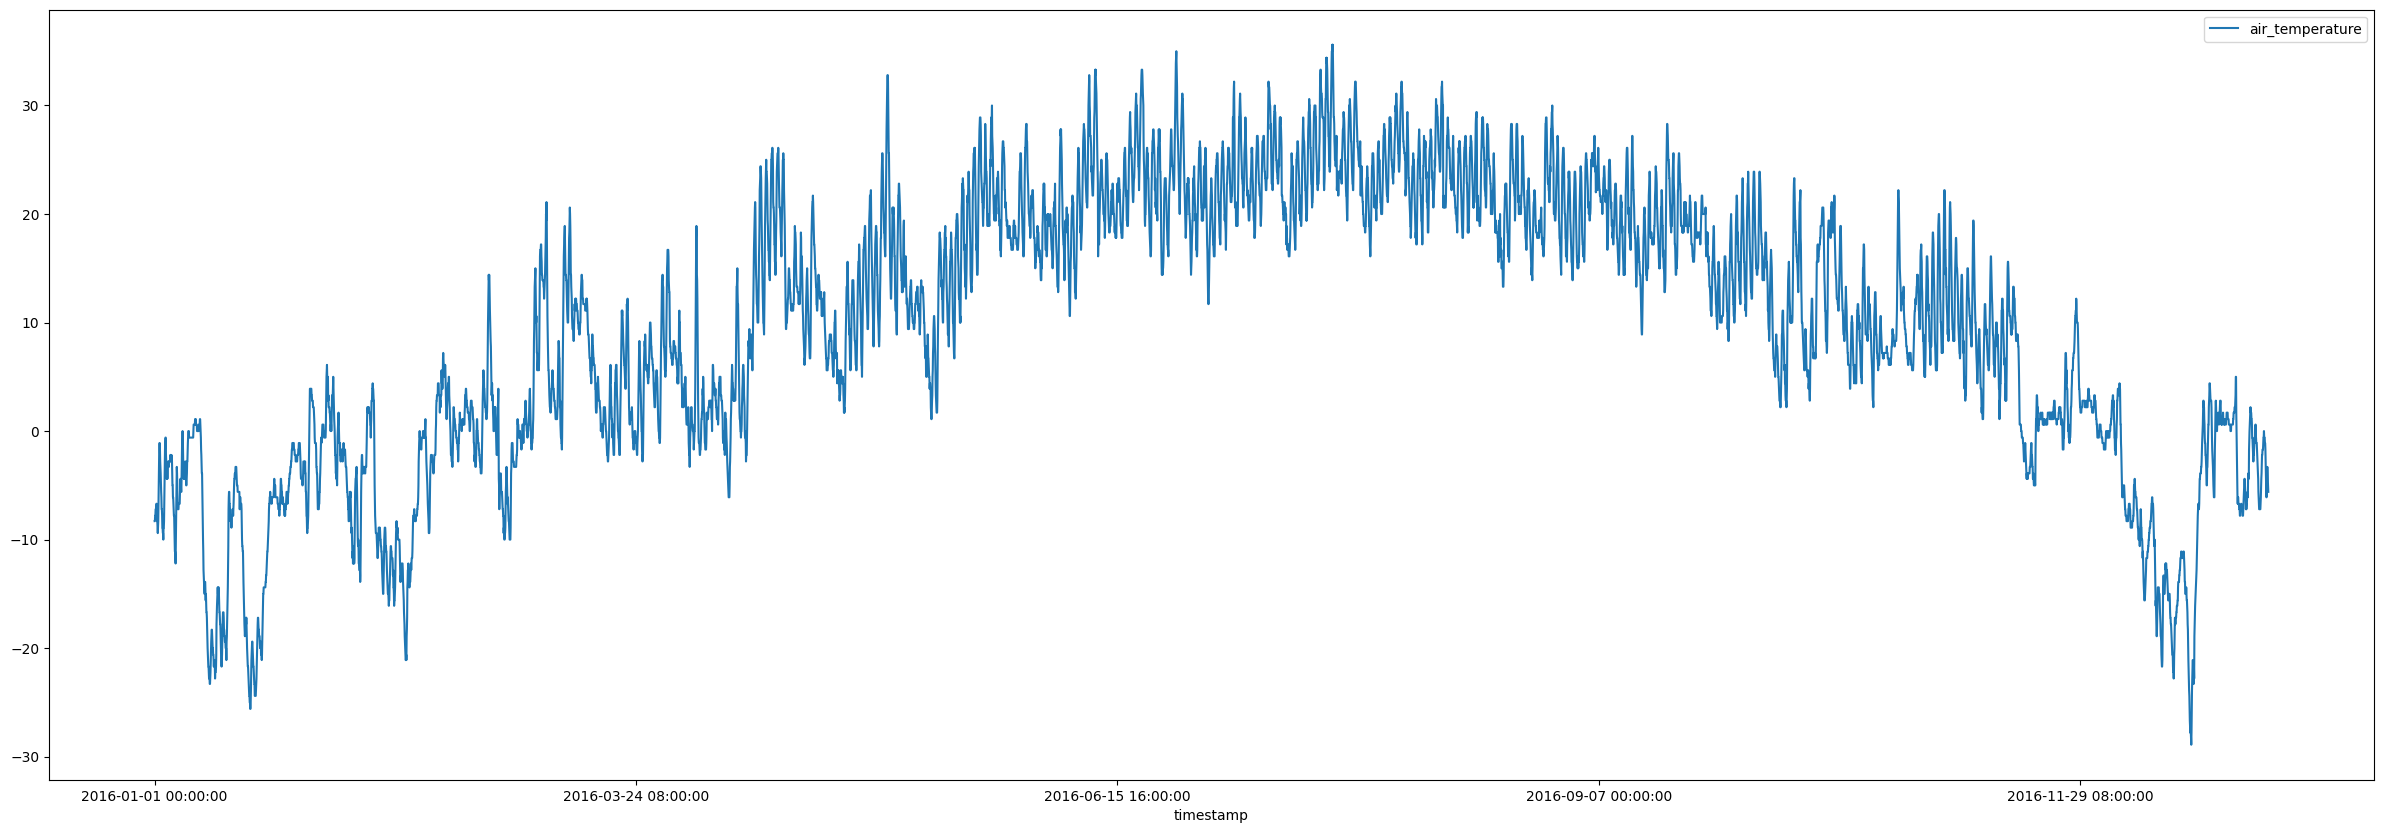

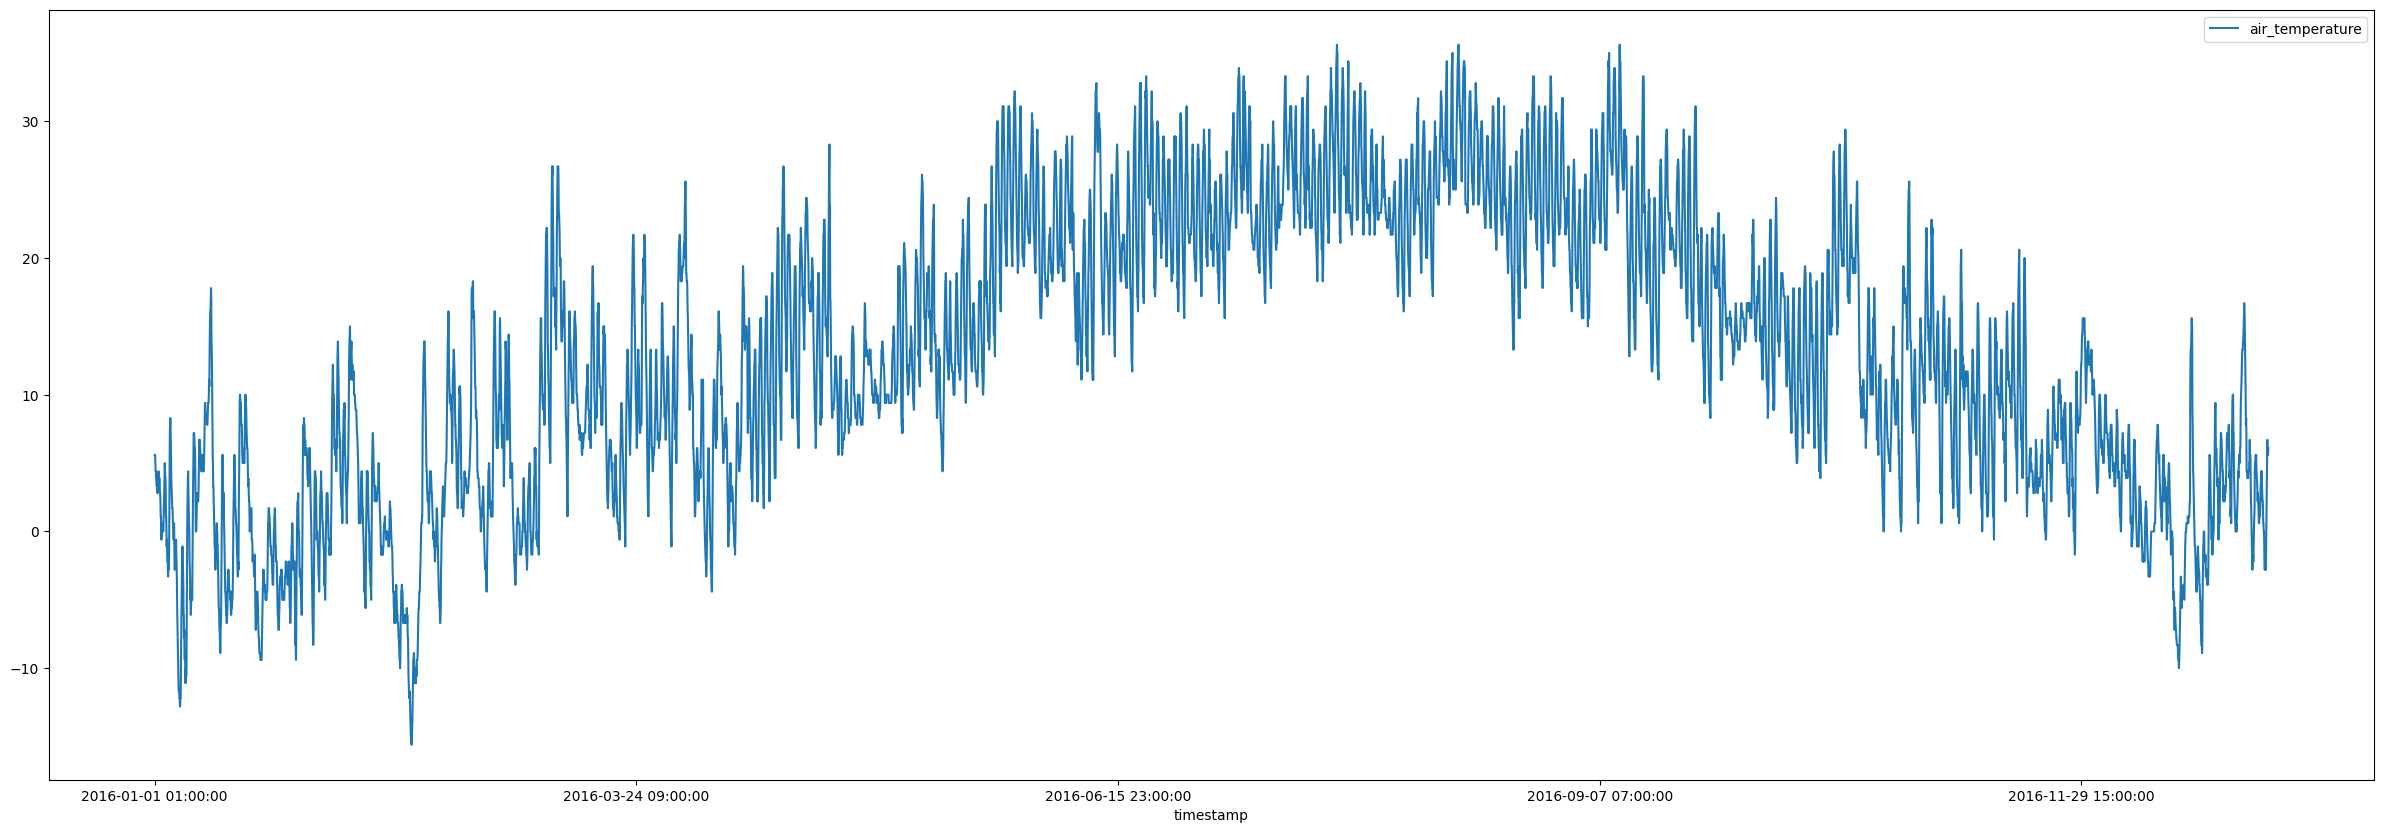

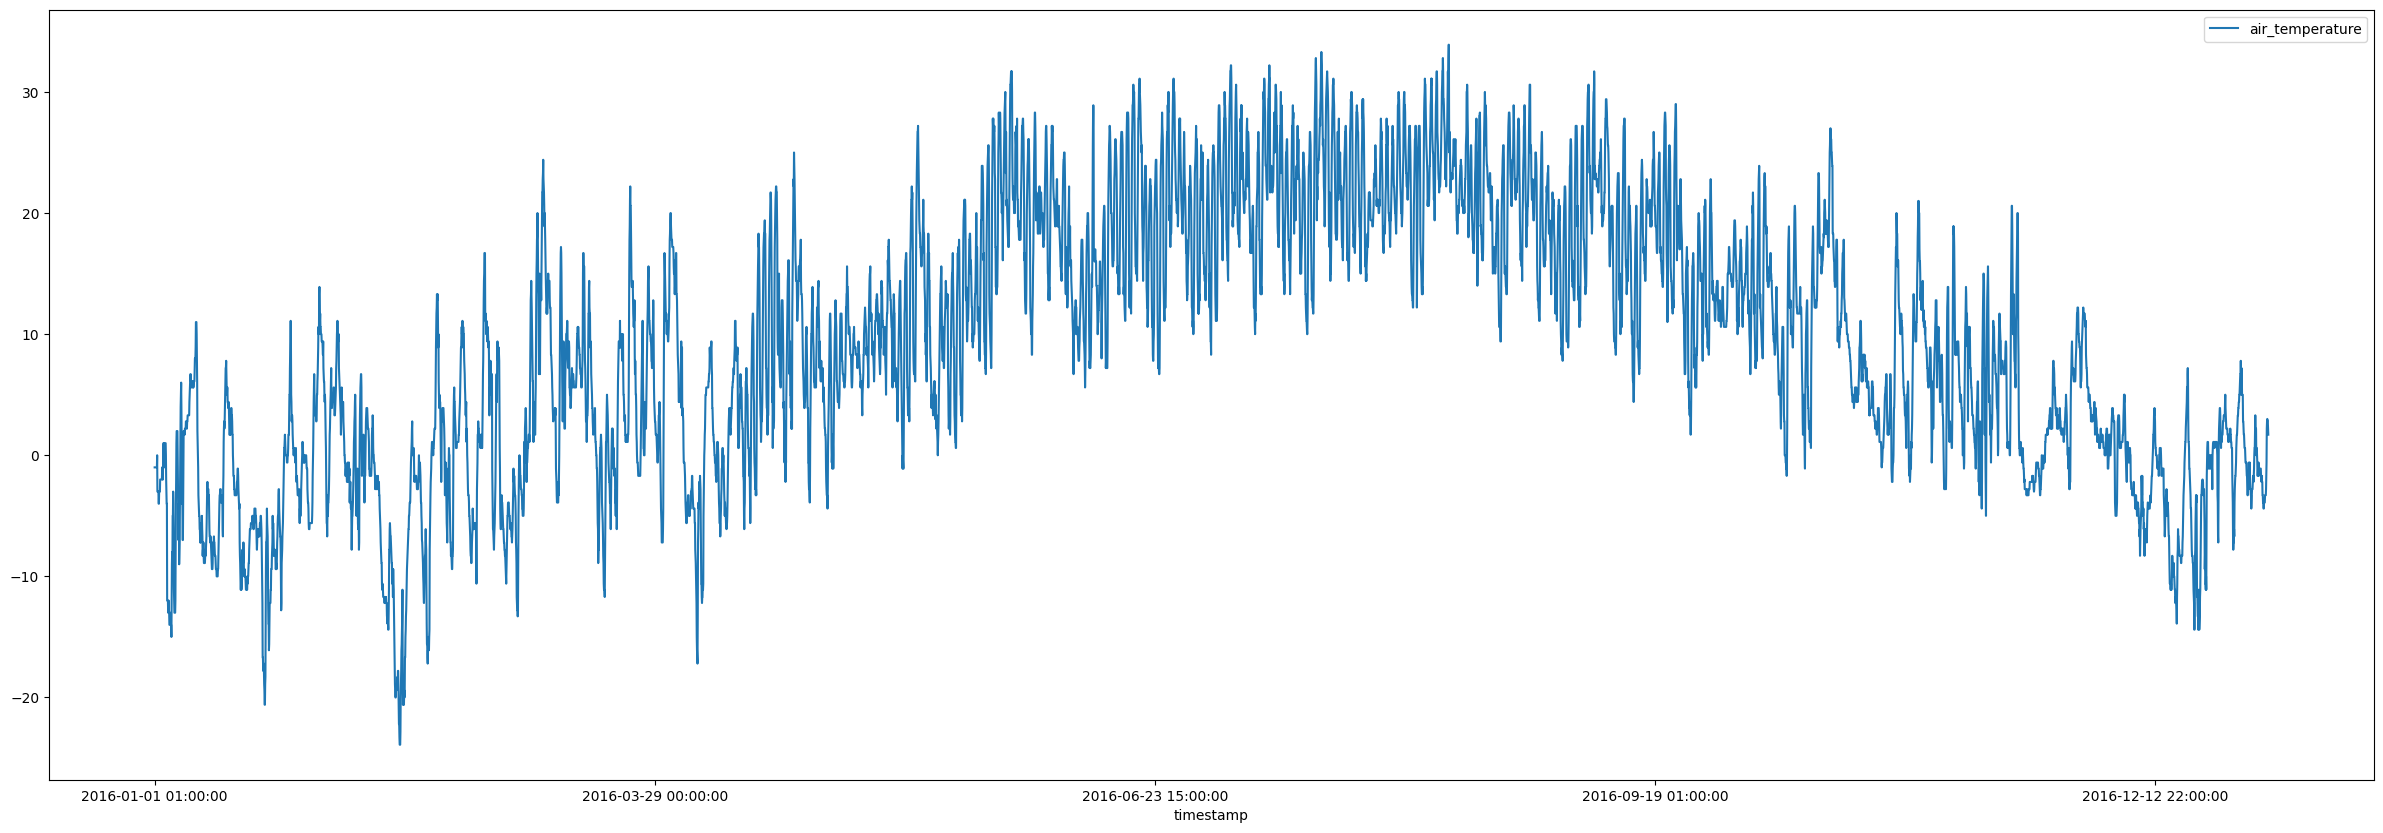

In [96]:
df_weather_train.groupby("site_id").plot(x="timestamp",y="air_temperature",subplots=True,figsize=(30,10))

In [97]:
df_building = pd.read_csv("building_metadata.csv")
df_building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.1+ KB


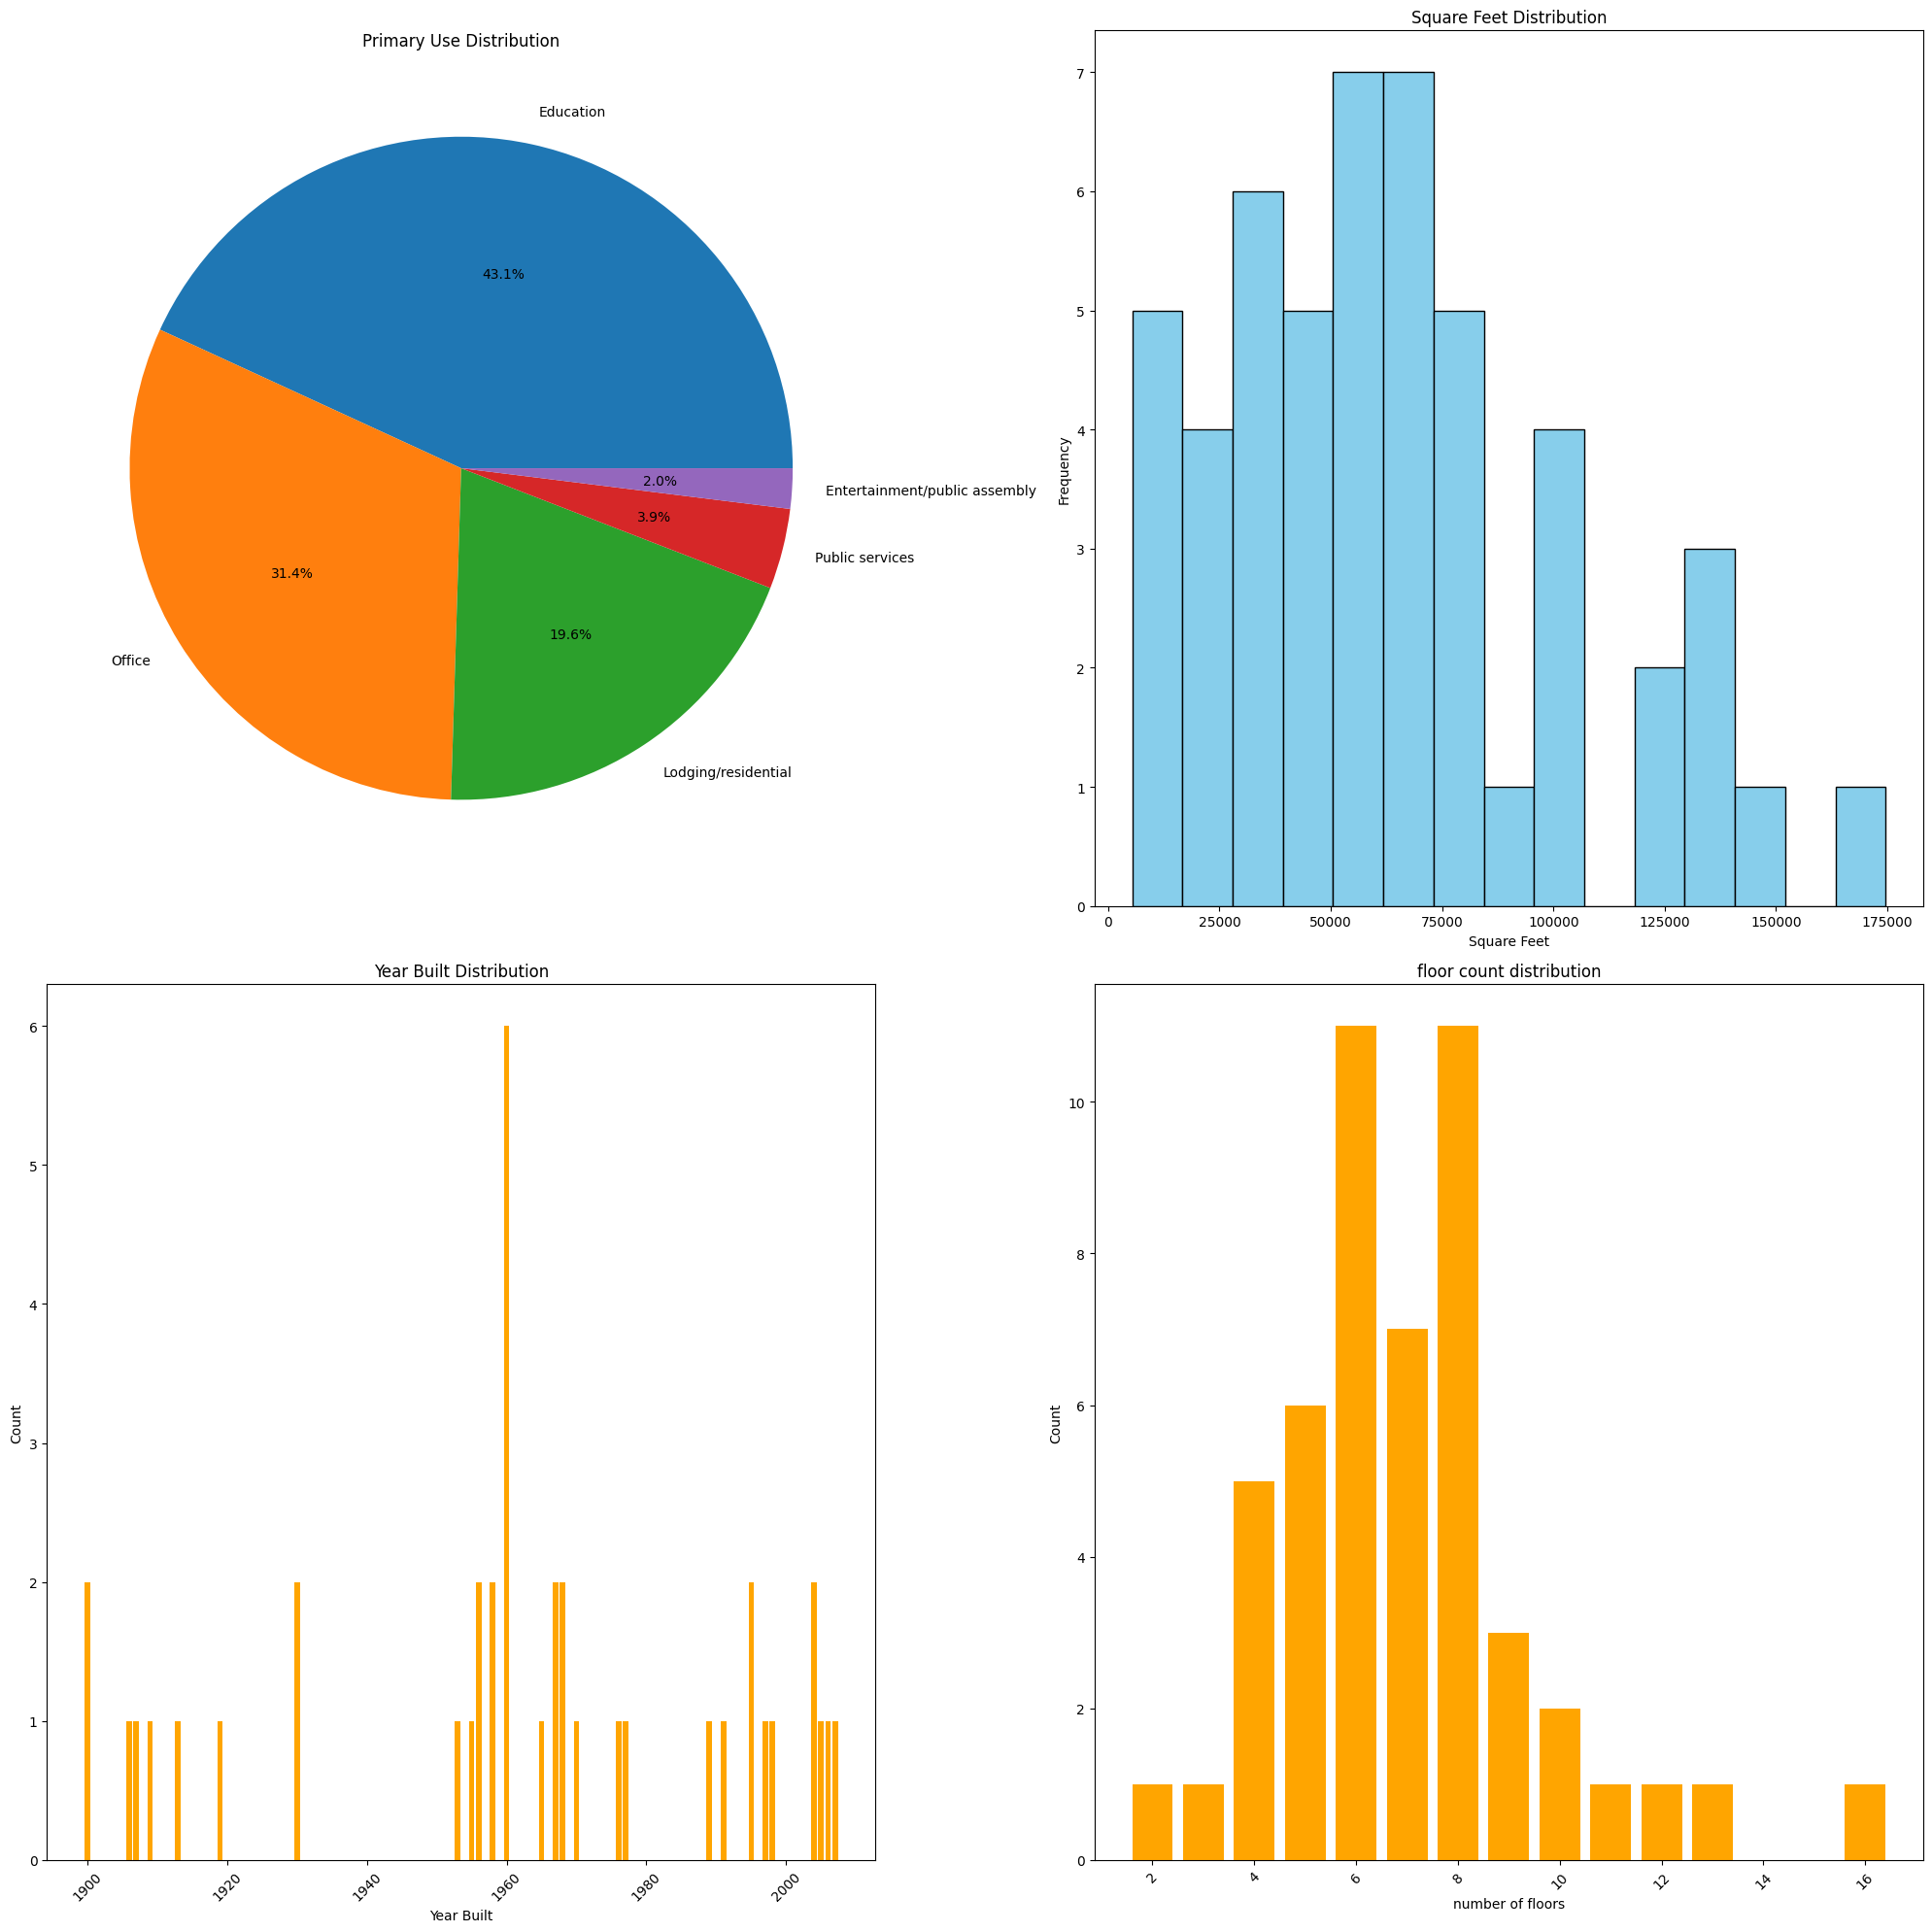

In [98]:
# Create subplots with 3 columns
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# Filter data for site_id == 0
fil_col_building = df_building[df_building["site_id"] == 1]

# Pie chart for primary_use distribution
counts_primary_use = fil_col_building['primary_use'].value_counts()
ax[0,0].pie(counts_primary_use.values, labels=counts_primary_use.keys(), autopct='%1.1f%%')
ax[0,0].set_title("Primary Use Distribution")

# Histogram for square_feet distribution
ax[0,1].hist(fil_col_building['square_feet'], bins=15, color='skyblue', edgecolor='black')
ax[0,1].set_title("Square Feet Distribution")
ax[0,1].set_xlabel("Square Feet")
ax[0,1].set_ylabel("Frequency")

# Bar chart for year_built distribution
count_year = fil_col_building['year_built'].value_counts().sort_index()
ax[1,0].bar(count_year.index, count_year.values, color='orange')
ax[1,0].set_title("Year Built Distribution")
ax[1,0].set_xlabel("Year Built")
ax[1,0].set_ylabel("Count")
ax[1,0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

count_floor = fil_col_building['floor_count'].value_counts().sort_index()
ax[1,1].bar(count_floor.index, count_floor.values, color='orange')
ax[1,1].set_title("floor count distribution")
ax[1,1].set_xlabel("number of floors")
ax[1,1].set_ylabel("Count")
ax[1,1].tick_params(axis='x', rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

#### Plotting for a particular building for all time

C:\Users\Valmik Belgaonkar\AppData\Local\Temp\ipykernel_16528\2193451382.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_building_meter['date'] = df_building_meter['timestamp'].dt.date


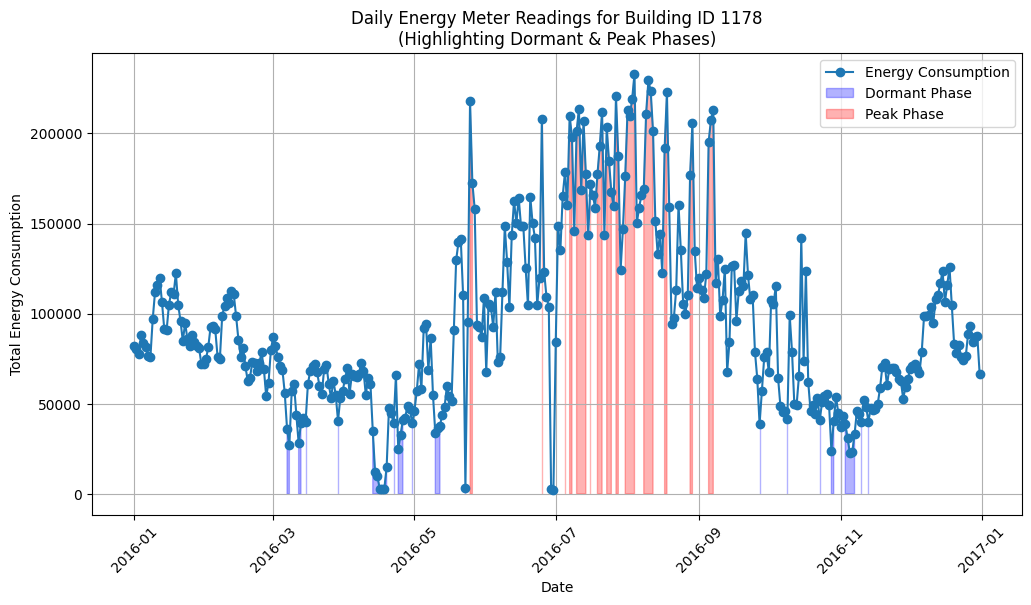

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df_building = pd.read_csv("building_metadata.csv")
df_meter = pd.read_csv("train.csv", parse_dates=['timestamp'])

# Merge datasets on building_id
df = df_meter.merge(df_building, on='building_id')

# Select a random building
random_building_id = np.random.choice(df['building_id'].unique())

# Filter data for the selected building
df_building_meter = df[df['building_id'] == random_building_id]

# Aggregate meter reading per day
df_building_meter['date'] = df_building_meter['timestamp'].dt.date
daily_meter_reading = df_building_meter.groupby('date')['meter_reading'].sum().reset_index()

# Define peak and dormant thresholds (e.g., 90th and 10th percentiles)
low_threshold = daily_meter_reading['meter_reading'].quantile(0.10)  # Dormant phase
high_threshold = daily_meter_reading['meter_reading'].quantile(0.90)  # Peak phase

# Classify peak and dormant phases
daily_meter_reading['phase'] = 'Normal'
daily_meter_reading.loc[daily_meter_reading['meter_reading'] <= low_threshold, 'phase'] = 'Dormant'
daily_meter_reading.loc[daily_meter_reading['meter_reading'] >= high_threshold, 'phase'] = 'Peak'

# Plot the energy usage with peak & dormant phases highlighted
plt.figure(figsize=(12, 6))
plt.plot(daily_meter_reading['date'], daily_meter_reading['meter_reading'], marker='o', linestyle='-', label="Energy Consumption")

# Highlight dormant phase in blue
plt.fill_between(daily_meter_reading['date'], daily_meter_reading['meter_reading'], where=(daily_meter_reading['phase'] == 'Dormant'), color='blue', alpha=0.3, label="Dormant Phase")

# Highlight peak phase in red
plt.fill_between(daily_meter_reading['date'], daily_meter_reading['meter_reading'], where=(daily_meter_reading['phase'] == 'Peak'), color='red', alpha=0.3, label="Peak Phase")

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Total Energy Consumption")
plt.title(f"Daily Energy Meter Readings for Building ID {random_building_id}\n(Highlighting Dormant & Peak Phases)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


#### Plotting for a particular building for a day

C:\Users\Valmik Belgaonkar\AppData\Local\Temp\ipykernel_16528\2209819644.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['hour'] = df_day['timestamp'].dt.hour


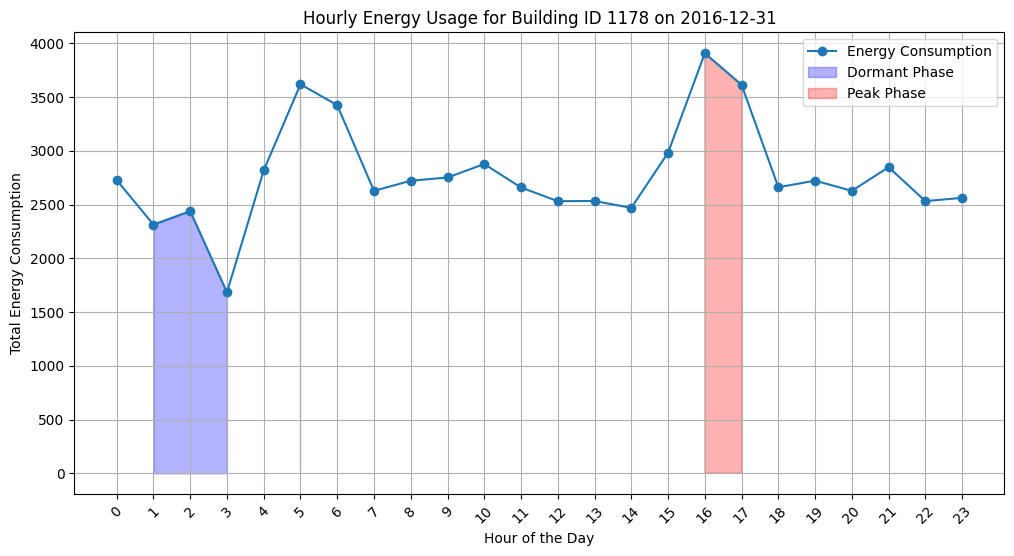

In [100]:
# Select a single day (e.g., most recent available date)
selected_date = df_building_meter['timestamp'].dt.date.max()  # Latest date
df_day = df_building_meter[df_building_meter['timestamp'].dt.date == selected_date]

# Extract hour from timestamp
df_day['hour'] = df_day['timestamp'].dt.hour

# Aggregate meter readings per hour
hourly_meter_reading = df_day.groupby('hour')['meter_reading'].sum()

# Define peak & dormant phases based on percentiles
low_threshold = hourly_meter_reading.quantile(0.10)  # Dormant phase (lowest 10%)
high_threshold = hourly_meter_reading.quantile(0.90)  # Peak phase (highest 10%)

# Classify peak and dormant phases
hourly_meter_reading_df = hourly_meter_reading.reset_index()
hourly_meter_reading_df['phase'] = 'Normal'
hourly_meter_reading_df.loc[hourly_meter_reading_df['meter_reading'] <= low_threshold, 'phase'] = 'Dormant'
hourly_meter_reading_df.loc[hourly_meter_reading_df['meter_reading'] >= high_threshold, 'phase'] = 'Peak'

# Plot the hourly energy usage
plt.figure(figsize=(12, 6))
plt.plot(hourly_meter_reading_df['hour'], hourly_meter_reading_df['meter_reading'], marker='o', linestyle='-', label="Energy Consumption")

# Highlight dormant phase in blue
plt.fill_between(hourly_meter_reading_df['hour'], hourly_meter_reading_df['meter_reading'], 
                 where=(hourly_meter_reading_df['phase'] == 'Dormant'), color='blue', alpha=0.3, label="Dormant Phase")

# Highlight peak phase in red
plt.fill_between(hourly_meter_reading_df['hour'], hourly_meter_reading_df['meter_reading'], 
                 where=(hourly_meter_reading_df['phase'] == 'Peak'), color='red', alpha=0.3, label="Peak Phase")

# Formatting the plot
plt.xlabel("Hour of the Day")
plt.ylabel("Total Energy Consumption")
plt.title(f"Hourly Energy Usage for Building ID {random_building_id} on {selected_date}")
plt.xticks(range(0, 24), rotation=45)
plt.legend()
plt.grid()
plt.show()


C:\Users\Valmik Belgaonkar\AppData\Local\Temp\ipykernel_16528\3157703719.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['hour'] = df_day['timestamp'].dt.hour


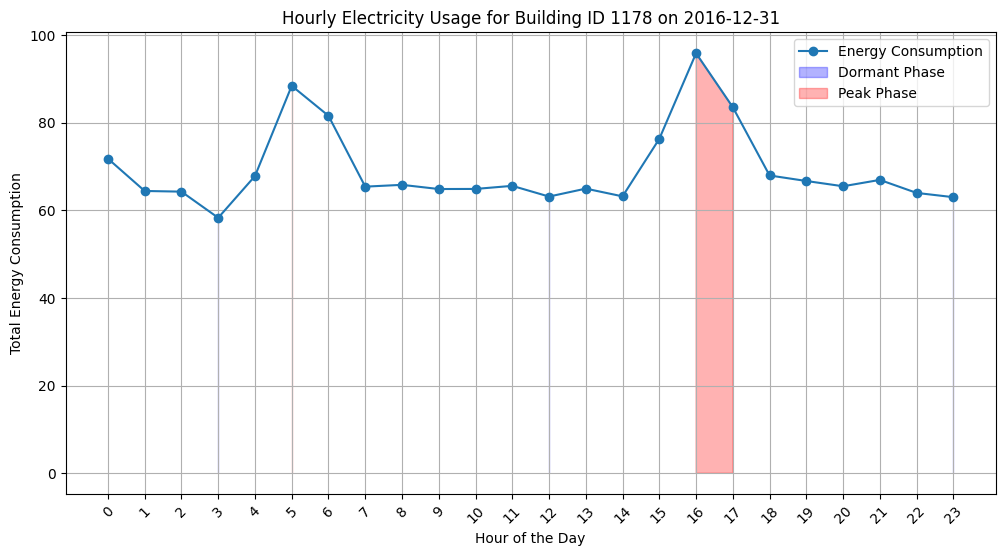

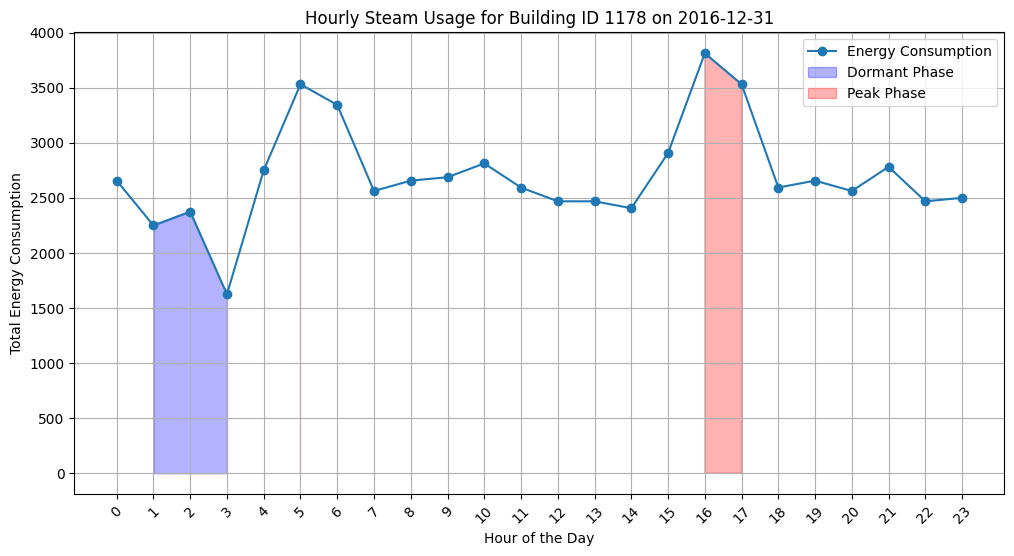

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

# Meter type mapping
meter_mapping = {0: 'Electricity', 1: 'Chilled Water', 2: 'Steam', 3: 'Hot Water'}

# Select a single day (e.g., most recent available date)
selected_date = df_building_meter['timestamp'].dt.date.max()  # Latest date

# Filter data for the selected date
df_day = df_building_meter[df_building_meter['timestamp'].dt.date == selected_date]

# Extract hour from timestamp
df_day['hour'] = df_day['timestamp'].dt.hour

# Generate plots for each meter type
for meter_type, meter_name in meter_mapping.items():
    df_meter = df_day[df_day['meter'] == meter_type]
    
    if df_meter.empty:
        continue  # Skip if no data for this meter type
    
    # Aggregate meter readings per hour
    hourly_meter_reading = df_meter.groupby('hour')['meter_reading'].sum()
    
    # Define peak & dormant phases based on percentiles
    low_threshold = hourly_meter_reading.quantile(0.10)  # Dormant phase (lowest 10%)
    high_threshold = hourly_meter_reading.quantile(0.90)  # Peak phase (highest 10%)
    
    # Classify peak and dormant phases
    hourly_meter_reading_df = hourly_meter_reading.reset_index()
    hourly_meter_reading_df['phase'] = 'Normal'
    hourly_meter_reading_df.loc[hourly_meter_reading_df['meter_reading'] <= low_threshold, 'phase'] = 'Dormant'
    hourly_meter_reading_df.loc[hourly_meter_reading_df['meter_reading'] >= high_threshold, 'phase'] = 'Peak'
    
    # Plot the hourly energy usage
    plt.figure(figsize=(12, 6))
    plt.plot(hourly_meter_reading_df['hour'], hourly_meter_reading_df['meter_reading'], marker='o', linestyle='-', label="Energy Consumption")
    
    # Highlight dormant phase in blue
    plt.fill_between(hourly_meter_reading_df['hour'], hourly_meter_reading_df['meter_reading'], 
                     where=(hourly_meter_reading_df['phase'] == 'Dormant'), color='blue', alpha=0.3, label="Dormant Phase")
    
    # Highlight peak phase in red
    plt.fill_between(hourly_meter_reading_df['hour'], hourly_meter_reading_df['meter_reading'], 
                     where=(hourly_meter_reading_df['phase'] == 'Peak'), color='red', alpha=0.3, label="Peak Phase")
    
    # Formatting the plot
    plt.xlabel("Hour of the Day")
    plt.ylabel("Total Energy Consumption")
    plt.title(f"Hourly {meter_name} Usage for Building ID {random_building_id} on {selected_date}")
    plt.xticks(range(0, 24), rotation=45)
    plt.legend()
    plt.grid()
    plt.show()